In [1]:
#trying:
#10T(t-k) +m(t) -> nstrat(t)+ Cop(t) + 10T(t)



In [242]:
import time
#import board
#import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import datetime
import os
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from numpy import loadtxt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
#from keras.layers.core import Dense, Activation, Dropout

In [221]:
def file():
    
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    file_name = 'csvFile_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    return  filePath

In [222]:
def filePath2Pandas(file_path):
    drop_column = 'Unnamed: 0'
    df = pd.read_csv(file_path, delimiter=',').drop(drop_column, axis = 'columns')

    column_names =  ['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T4', 'T3', 'T2', 'T1',
        'T0', 'T9', 'T8', 'T7', 'T6', 'T5', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']
    df.columns =column_names
    df = df[['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
        'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']]
    
    #df.columns.values[[11,12,13,14,15,16,17,18,19,20]] = ['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']

    return df
df_gross=filePath2Pandas(file())  


In [293]:
df_gross.columns

Index(['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
       'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ'],
      dtype='object')

In [385]:
#df_ndis =df_gross.dropna(subset = ['nDis'])
#df_copy = df_gross.copy()
#df_cop = df_copy[['COP']]
#print (df_cop.to_string())
#df_copy['cop_copied'] = np.where((df_copy.Heat_Capacity_kW >=-1) & (df_copy.Heat_Capacity_kW <=0.2), 0, df_copy.COP)
#print (df_copy['cop_copied'].to_string())
#df_zeroCop = df_copy[['cop_copied']]
#df_zeroCop
#df_All_zeroCOP = df_copy.loc[df_copy['cop_copied']==0]
#df_All_zeroCOP[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]
#print (df_All_zeroCOP[['dateTime']].to_string())
#df_All_zeroCOP

In [384]:

#df_discharging_time =df_gross.loc[df_gross['flowLoad']>10 ][['dateTime']]

#df_discharging_all = df_gross[df_gross.index.isin(df_discharging_time.index)]

#df_tem_all = df_discharging_all[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]
#df_tem_all 

In [383]:
#df_nDis= df_gross.dropna(subset = ['nDis'])
#df_nDis= df_nDis[['nDis']].dropna()
#print (df_nDis.to_string())
#df_nDis

In [382]:
#df_nStratDis = df_gross.dropna(subset = ['nStratDischarge'])
#nStratDis = df_nStratDis[['nStratDischarge']] 
#nStratDis = nStratDis[nStratDis>0].dropna()
#print (nStratDis.to_string())
#nStratDis

In [392]:
def disCharging_df(df):
    '''
    #df_ndis =df_gross.dropna(subset = ['nDis'])
    #df_copy = df_gross.copy()
    df_cop = df[['COP']]
    #print (df_cop.to_string())
    df['cop_copied'] = np.where((df.Heat_Capacity_kW >=-1) & (df.Heat_Capacity_kW <=0.2), 0, df.COP)
    #print (df_copy['cop_copied'].to_string())
    df_zeroCop = df[['cop_copied']]
    #df_zeroCop
    df_All_zeroCOP = df.loc[df['cop_copied']==0]
    #df_All_zeroCOP[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]
    #print (df_All_zeroCOP[['dateTime']].to_string())
    #df_All_zeroCOP
    '''
    
    #1. tem during discharging 
    df_discharging_time =df.loc[df['flowLoad']>10 ][['dateTime']]

    df_discharging_all = df[df.index.isin(df_discharging_time.index)]

    df_discharging_Tem = df_discharging_all[['T0', 'T1', 'T2', 'T3','T4',\
                                             'T5', 'T6', 'T7', 'T8', 'T9']].reset_index(drop=True)
    #print (df_discharging_Tem )
    #2. nDischarging values
    df_nDis= df.dropna(subset = ['nDis'])
    df_nDis= df_nDis[['nDis']].dropna().reset_index(drop=True)
    #print (df_nDis.to_string())
    #print (df_nDis)
    
    #3. nstratDischarging values
    df_nStratDis = df.dropna(subset = ['nStratDischarge'])
    df_nStratDis = df_nStratDis[['nStratDischarge']] 
    df_nStratDis = df_nStratDis[nStratDis>0].dropna().reset_index(drop=True)
    #print (nStratDis.to_string())
    #df_nStratDis
    #print (df_nStratDis)
    
    
    #4. mload values
    df_mload = df_gross.loc[df_gross['flowLoad']>10 ][['flowLoad']].reset_index(drop=True)
    #print (df_mload)

    len_small = min (len(df_discharging_Tem), len(df_nDis), len(df_nStratDis), len(df_mload) )
    
    df_discharging_trunc_Tem =  df_discharging_Tem.iloc[:len_small]
    df_trunc_nDis = df_nDis.iloc[:len_small]
    df_trunc_nStratDis = df_nStratDis.iloc[:len_small]
    df_trunc_mload = df_mload[:len_small]
    l_ist = [df_discharging_trunc_Tem, df_trunc_mload, df_trunc_nDis,df_trunc_nStratDis ]
    df =  pd.concat(l_ist, axis=1)

    return df

disChargingIn_df= disCharging_df(df_gross)
disChargingIn_df

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,flowLoad,nDis,nStratDischarge
0,34.8480,50.7970,51.3084,51.8880,52.2290,52.8088,52.8770,53.0817,53.1499,53.0476,413.206,0.006901,0.031045
1,34.8140,50.8311,51.3084,51.9221,52.2631,52.8770,52.8770,53.0476,53.1840,52.9793,587.586,0.004290,0.148028
2,34.7801,50.7629,51.3084,51.8539,52.2290,52.8770,52.9111,53.0817,53.2181,52.9452,575.750,0.005505,0.214233
3,35.1533,50.0131,51.2402,51.8539,52.2290,52.8770,52.8770,53.0476,53.1158,53.0476,551.289,0.007821,0.274274
4,35.9338,48.8546,51.2402,51.8880,52.1608,52.8429,52.8770,53.0476,53.0817,53.0476,552.868,0.010405,0.332932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,21.6093,21.6430,21.4065,21.3051,21.0686,21.2038,21.4741,23.2317,27.2911,46.6409,505.525,0.921207,0.975399
379,21.5755,21.6430,21.3727,21.3727,21.1024,21.3727,21.4741,23.2317,27.1219,46.4707,508.681,0.924956,0.975067
380,21.5755,21.6430,21.4065,21.3389,21.1362,21.1700,21.4403,23.1640,26.9188,46.0622,511.837,0.928410,0.975582
381,21.5755,21.6768,21.4065,21.2714,21.1700,21.3051,21.4403,23.1640,26.7496,45.7899,514.204,0.932715,0.975714


In [223]:
def charging_df(df):
    #df_tem = df[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    #df_tem = df_tem[df_tem>0]
    df_charging = df.loc[df_gross['Heat_Capacity_kW']>0.2]

    #df_tem = df_charging[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    df_charging_all = df_charging[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9', 
                                   'flowHP', 'COP','nStratCharging']]
    df_chargeFilter = df_charging_all[(df_charging_all['nStratCharging']>0.000001)&\
                               (df_charging_all['nStratCharging']<1.1)]
    #df_charging_all.dropna()
    return df_chargeFilter.dropna()

chargingIn_df = charging_df(df_gross)


In [224]:
def fileNameForDLFigures(midfix = None):
    
    
    from datetime import date
    today = date.today()
    # dd/mm/YY
    d1 = today.strftime("%d_%m_%Y")
    #print("d1 =", d1)
    cwdir = os.getcwd()
    mkSubDir =  os.path.join(cwdir, d1)
    mkSubDir
    if not os.path.exists(mkSubDir):
        #os.makedirs('my_folder')
        os.mkdir(mkSubDir)
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    head, tail = os.path.split(file())
    name =tail.split('_')[1:]
    file_name = "_".join(name)
    file_name=file_name.split('.')[0]
    #join

    #file_name = 'DL_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    
    #cwdir = os.getcwd()
    #mkSubDir =  os.path.join(cwdir, 'DL_sub')
    suffix = '.svg'
    filePath = os.path.join(mkSubDir, midfix + file_name +suffix)
    return  filePath

In [225]:
def modelDir(ModelName=None):
    model = fileNameForDLFigures(midfix = 'Tem').split('/')[:-1]
    model_dir = "/".join(model)
    #model_dir 
    modelPath = os.path.join(model_dir, ModelName)
    return modelPath

In [226]:
#chargingIn_flow_df  = chargingIn_df.iloc[:, :-2]
#chargingIn_flow_df 

In [227]:
"""
Normalization should be done BEFORE one prepares the data for ANN or LSTM input.
Normalization is done feature-wise (that means column-wise).
"""

def normalize(X):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(X)
    scaled_data = scaler.transform(X)
    return scaled_data, scaler

df_nrm, scaler = normalize(chargingIn_df)
df_nrm = pd.DataFrame(df_nrm)
df_nrm.columns = chargingIn_df.columns
df_nrm

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,flowHP,COP,nStratCharging
0,-1.000000,-1.000000,-1.000000,-1.000000,-0.994387,-0.988697,-1.000000,-1.000000,-1.000000,-1.000000,-4.000000e-01,0.997454,-0.984393
1,-0.988292,-0.997219,-1.000000,-0.994339,-1.000000,-1.000000,-1.000000,-0.991593,-1.000000,-0.994397,-4.000000e-01,0.996061,-0.992495
2,-0.964876,-0.988894,-0.988771,-0.994339,-0.988774,-0.974555,-1.000000,-0.985990,-0.988788,-0.991592,-1.000000e+00,1.000000,-1.000000
3,-0.964876,-0.972244,-0.969116,-0.977355,-0.980351,-0.963252,-0.985850,-0.957955,-0.974770,-0.980386,-4.000000e-01,0.980620,-0.983989
4,-0.970730,-0.963919,-0.963502,-0.977355,-0.980351,-0.985867,-0.977350,-0.957955,-0.969168,-0.980386,-4.000000e-01,0.978897,-0.973981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,0.970626,0.991617,0.988688,1.000000,0.994346,0.985767,0.974341,0.994356,0.983061,0.991526,-7.105427e-15,-0.999375,0.773884
649,0.964754,0.994406,0.991516,0.997148,0.997173,0.988613,0.982900,0.997178,0.991535,0.994348,8.000000e-01,-0.997851,0.825003
650,0.970626,1.000000,0.997172,0.997148,1.000000,0.991460,0.985750,0.997178,1.000000,0.991526,4.000000e-01,-0.992920,0.947610
651,0.982386,1.000000,0.997172,0.994297,0.997173,0.994307,1.000000,1.000000,0.997178,0.994348,-7.105427e-15,-0.990666,0.997942


In [237]:

#n_features = 10 is 10 when, input in 10 columns temperature


#######################################
# prepare functions for ANN
# by flattning k rows to one table row (input for sample)
# and generating the corresponding next line (y)
#######################################

"""
df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]])
X, y = prepare_df(df)

last row is last y
X doesn't contain last row and begins from first row!
"""

def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    return np.ndarray.flatten(np.array(df))

def prepare_df(df):
    n_rows, n_cols = df.shape
    new_rows = np.array([flatten_row_wise(df.iloc[(i-k):i]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys



X = df_nrm.iloc[:, :-3]
y =df_nrm.loc[:, df_nrm.columns != 'flowHP']
mhp = df_nrm[['flowHP']]


In [50]:
X

,x,y,z
0,1,4,10
1,2,5,11
2,3,6,12
3,4,7,1
4,5,8,3


In [427]:

def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    #arr = np.ndarray.flatten(np.array(df))
    #append(arr,)
    
    return np.ndarray.flatten(np.array(df))
def prepare_df(df, m, y_df):
    n_rows, n_cols = df.shape
    new_rows = np.array([np.append(flatten_row_wise(df.iloc[(i-k):i]), m.iloc[i-k:i]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in y_df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys


In [517]:
X = df_nrm.iloc[:, :-3]
y =df_nrm.loc[:, df_nrm.columns != 'flowHP']
mhp = df_nrm[['flowHP']]
X

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,-1.000000,-1.000000,-1.000000,-1.000000,-0.994387,-0.988697,-1.000000,-1.000000,-1.000000,-1.000000
1,-0.988292,-0.997219,-1.000000,-0.994339,-1.000000,-1.000000,-1.000000,-0.991593,-1.000000,-0.994397
2,-0.964876,-0.988894,-0.988771,-0.994339,-0.988774,-0.974555,-1.000000,-0.985990,-0.988788,-0.991592
3,-0.964876,-0.972244,-0.969116,-0.977355,-0.980351,-0.963252,-0.985850,-0.957955,-0.974770,-0.980386
4,-0.970730,-0.963919,-0.963502,-0.977355,-0.980351,-0.985867,-0.977350,-0.957955,-0.969168,-0.980386
...,...,...,...,...,...,...,...,...,...,...
648,0.970626,0.991617,0.988688,1.000000,0.994346,0.985767,0.974341,0.994356,0.983061,0.991526
649,0.964754,0.994406,0.991516,0.997148,0.997173,0.988613,0.982900,0.997178,0.991535,0.994348
650,0.970626,1.000000,0.997172,0.997148,1.000000,0.991460,0.985750,0.997178,1.000000,0.991526
651,0.982386,1.000000,0.997172,0.994297,0.997173,0.994307,1.000000,1.000000,0.997178,0.994348


In [231]:
Xdf1, ydf1 = prepare_df(X, mhp, y)

In [232]:
def train_test_split_indexes(X, y, test_size=0.2, random_state=42, shuffle=False):
    X_train_indexes, X_test_indexes, y_train_indexes, y_test_indexes = train_test_split(pd.DataFrame(list(range(X.shape[0]))),
                                                                                        pd.DataFrame(list(range(y.shape[0]))),
                                                                                        test_size=test_size,
                                                                                        random_state=random_state,
                                                                                        shuffle=shuffle)
    train_indexes, test_indexes = [x for x in X_train_indexes.iloc[:, 0]]  , [x for x in X_test_indexes.iloc[:, 0]]
    return sorted(train_indexes), sorted(test_indexes)


In [233]:
def splitter(X, y, train_indexes, test_indexes):
    X_train = X.iloc[train_indexes, :]
    y_train = y.iloc[train_indexes, :]
    X_test = X.iloc[test_indexes, :]
    y_test = y.iloc[test_indexes, :]
    return X_train, X_test, y_train, y_test


In [234]:
train_indexes, test_indexes = train_test_split_indexes(Xdf1, ydf1, test_size=0.2, random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = splitter(pd.DataFrame(Xdf1), pd.DataFrame(ydf1), train_indexes, test_indexes)




In [235]:
X_train = np.array(X_train)

X_test = np.array(X_test)

y_train = np.array(y_train)

y_test = np.array(y_test)

In [236]:
X_train.shape, y_train.shape

((520, 33), (520, 12))

In [238]:
k =3
n_features = 11
out_features = y_train.shape[1]
out_features
epochs =10000
batch_size = 1000


In [239]:
modelDir(ModelName='InTemMhpOutTnCOP1.h5')

'/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql/10_05_2021/InTemMhpOutTnCOP1.h5'

In [246]:
def create_model(time_steps, n_features):
    model = Sequential()
    model.add(LSTM(20, input_shape = (time_steps, n_features)))
    model.add(Dropout(0.2))
    model.add(Dense(out_features, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model


In [247]:

model = create_model(k, n_features)
model_fpath=modelDir(ModelName='InTemMhpOutTnCOP1.h5')
callbacks_list = [ ModelCheckpoint(filepath=model_fpath,
                                   monitor="val_loss",
                                   save_best_only=True,                 
                                   mode="min")]

In [248]:
history = model.fit(X_train.reshape(X_train.shape[0], k, n_features),
                    y_train.reshape(y_train.shape[0], out_features),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.3,
                    callbacks = callbacks_list,
                    verbose=1)

Train on 364 samples, validate on 156 samples
Epoch 1/10000
364/364 [==============================] - 1s 3ms/step - loss: 0.2124 - mean_squared_error: 0.2124 - val_loss: 0.5125 - val_mean_squared_error: 0.5125
Epoch 2/10000
364/364 [==============================] - 0s 101us/step - loss: 0.2074 - mean_squared_error: 0.2074 - val_loss: 0.5073 - val_mean_squared_error: 0.5073
Epoch 3/10000
364/364 [==============================] - 0s 25us/step - loss: 0.2011 - mean_squared_error: 0.2011 - val_loss: 0.5018 - val_mean_squared_error: 0.5018
Epoch 4/10000
364/364 [==============================] - 0s 48us/step - loss: 0.1978 - mean_squared_error: 0.1978 - val_loss: 0.4963 - val_mean_squared_error: 0.4963
Epoch 5/10000
364/364 [==============================] - 0s 41us/step - loss: 0.1929 - mean_squared_error: 0.1929 - val_loss: 0.4906 - val_mean_squared_error: 0.4906
Epoch 6/10000
364/364 [==============================] - 0s 44us/step - loss: 0.1905 - mean_squared_error: 0.1905 - val_loss

Epoch 50/10000
364/364 [==============================] - 0s 98us/step - loss: 0.0644 - mean_squared_error: 0.0644 - val_loss: 0.3232 - val_mean_squared_error: 0.3232
Epoch 51/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0653 - mean_squared_error: 0.0653 - val_loss: 0.3205 - val_mean_squared_error: 0.3205
Epoch 52/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0620 - mean_squared_error: 0.0620 - val_loss: 0.3179 - val_mean_squared_error: 0.3179
Epoch 53/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.3153 - val_mean_squared_error: 0.3153
Epoch 54/10000
364/364 [==============================] - 0s 31us/step - loss: 0.0593 - mean_squared_error: 0.0593 - val_loss: 0.3127 - val_mean_squared_error: 0.3127
Epoch 55/10000
364/364 [==============================] - 0s 32us/step - loss: 0.0588 - mean_squared_error: 0.0588 - val_loss: 0.3100 - val_mean_squared_error: 0.310

364/364 [==============================] - 0s 66us/step - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.1724 - val_mean_squared_error: 0.1724
Epoch 100/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.1696 - val_mean_squared_error: 0.1696
Epoch 101/10000
364/364 [==============================] - 0s 27us/step - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.1668 - val_mean_squared_error: 0.1668
Epoch 102/10000
364/364 [==============================] - 0s 29us/step - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.1641 - val_mean_squared_error: 0.1641
Epoch 103/10000
364/364 [==============================] - 0s 137us/step - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.1615 - val_mean_squared_error: 0.1615
Epoch 104/10000
364/364 [==============================] - 0s 74us/step - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.1590 - val_mean_squared_error: 0.1590
Epoch 1

Epoch 148/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.1007 - val_mean_squared_error: 0.1007
Epoch 149/10000
364/364 [==============================] - 0s 108us/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.1001 - val_mean_squared_error: 0.1001
Epoch 150/10000
364/364 [==============================] - 0s 41us/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0997 - val_mean_squared_error: 0.0997
Epoch 151/10000
364/364 [==============================] - 0s 82us/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0992 - val_mean_squared_error: 0.0992
Epoch 152/10000
364/364 [==============================] - 0s 126us/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0988 - val_mean_squared_error: 0.0988
Epoch 153/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0983 - val_mean_squared_erro

Epoch 197/10000
364/364 [==============================] - 0s 135us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0807 - val_mean_squared_error: 0.0807
Epoch 198/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0802 - val_mean_squared_error: 0.0802
Epoch 199/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0798 - val_mean_squared_error: 0.0798
Epoch 200/10000
364/364 [==============================] - 0s 79us/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0794 - val_mean_squared_error: 0.0794
Epoch 201/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0791 - val_mean_squared_error: 0.0791
Epoch 202/10000
364/364 [==============================] - 0s 38us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0787 - val_mean_squared_error

Epoch 246/10000
364/364 [==============================] - 0s 32us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0636 - val_mean_squared_error: 0.0636
Epoch 247/10000
364/364 [==============================] - 0s 82us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0635 - val_mean_squared_error: 0.0635
Epoch 248/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0633 - val_mean_squared_error: 0.0633
Epoch 249/10000
364/364 [==============================] - 0s 80us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0631 - val_mean_squared_error: 0.0631
Epoch 250/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0629 - val_mean_squared_error: 0.0629
Epoch 251/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0627 - val_mean_squared_error:

Epoch 295/10000
364/364 [==============================] - 0s 31us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0503 - val_mean_squared_error: 0.0503
Epoch 296/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0500 - val_mean_squared_error: 0.0500
Epoch 297/10000
364/364 [==============================] - 0s 33us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0498 - val_mean_squared_error: 0.0498
Epoch 298/10000
364/364 [==============================] - 0s 43us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 299/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 300/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0492 - val_mean_squared_error:

Epoch 344/10000
364/364 [==============================] - 0s 95us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 345/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 346/10000
364/364 [==============================] - 0s 43us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 347/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 348/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 349/10000
364/364 [==============================] - 0s 41us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0395 - val_mean_squared_error:

Epoch 393/10000
364/364 [==============================] - 0s 85us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 394/10000
364/364 [==============================] - 0s 102us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 395/10000
364/364 [==============================] - 0s 131us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 396/10000
364/364 [==============================] - 0s 161us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0340 - val_mean_squared_error: 0.0340
Epoch 397/10000
364/364 [==============================] - 0s 266us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 398/10000
364/364 [==============================] - 0s 89us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0333 - val_mean_squared_er

Epoch 442/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 443/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 444/10000
364/364 [==============================] - 0s 166us/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 445/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 446/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 447/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0265 - val_mean_squared_error

Epoch 491/10000
364/364 [==============================] - 0s 97us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 492/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 493/10000
364/364 [==============================] - 0s 39us/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch 494/10000
364/364 [==============================] - 0s 89us/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 495/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 496/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0209 - val_mean_squared_error:

Epoch 540/10000
364/364 [==============================] - 0s 69us/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 541/10000
364/364 [==============================] - 0s 81us/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 542/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 543/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 544/10000
364/364 [==============================] - 0s 116us/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 545/10000
364/364 [==============================] - 0s 117us/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0170 - val_mean_squared_erro

Epoch 589/10000
364/364 [==============================] - 0s 71us/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 590/10000
364/364 [==============================] - 0s 120us/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 591/10000
364/364 [==============================] - 0s 62us/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 592/10000
364/364 [==============================] - 0s 72us/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 593/10000
364/364 [==============================] - 0s 102us/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 594/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0154 - val_mean_squared_erro

Epoch 638/10000
364/364 [==============================] - 0s 76us/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 639/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 640/10000
364/364 [==============================] - 0s 99us/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 641/10000
364/364 [==============================] - 0s 69us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 642/10000
364/364 [==============================] - 0s 79us/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 643/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0129 - val_mean_squared_error:

Epoch 687/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 688/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 689/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 690/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 691/10000
364/364 [==============================] - 0s 82us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 692/10000
364/364 [==============================] - 0s 90us/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0115 - val_mean_squared_error:

Epoch 736/10000
364/364 [==============================] - 0s 106us/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 737/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 738/10000
364/364 [==============================] - 0s 71us/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 739/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 740/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 741/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0106 - val_mean_squared_error

Epoch 785/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 786/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 787/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 788/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 789/10000
364/364 [==============================] - 0s 74us/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 790/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0084 - val_mean_squared_error:

Epoch 834/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 835/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 836/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 837/10000
364/364 [==============================] - 0s 158us/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 838/10000
364/364 [==============================] - 0s 102us/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 839/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0069 - val_mean_squared_erro

Epoch 883/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 884/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 885/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 886/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 887/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 888/10000
364/364 [==============================] - 0s 39us/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0072 - val_mean_squared_error:

Epoch 932/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 933/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 934/10000
364/364 [==============================] - 0s 78us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 935/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 936/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 937/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0073 - val_mean_squared_error:

Epoch 981/10000
364/364 [==============================] - 0s 89us/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 982/10000
364/364 [==============================] - 0s 95us/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 983/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 984/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 985/10000
364/364 [==============================] - 0s 96us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 986/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0066 - val_mean_squared_error:

Epoch 1030/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1031/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 1032/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 1033/10000
364/364 [==============================] - 0s 35us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 1034/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1035/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0066 - val_mean_squared_

Epoch 1079/10000
364/364 [==============================] - 0s 103us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 1080/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 1081/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 1082/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 1083/10000
364/364 [==============================] - 0s 105us/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 1084/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0054 - val_mean_square

Epoch 1128/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 1129/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 1130/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 1131/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 1132/10000
364/364 [==============================] - 0s 81us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 1133/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0056 - val_mean_squared_

Epoch 1177/10000
364/364 [==============================] - 0s 33us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 1178/10000
364/364 [==============================] - 0s 39us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 1179/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 1180/10000
364/364 [==============================] - 0s 38us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 1181/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 1182/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0054 - val_mean_squared_

Epoch 1226/10000
364/364 [==============================] - 0s 34us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 1227/10000
364/364 [==============================] - 0s 79us/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 1228/10000
364/364 [==============================] - 0s 52us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 1229/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 1230/10000
364/364 [==============================] - 0s 70us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 1231/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0059 - val_mean_squared_

Epoch 1275/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 1276/10000
364/364 [==============================] - 0s 71us/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 1277/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 1278/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 1279/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 1280/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0051 - val_mean_squared_

Epoch 1324/10000
364/364 [==============================] - 0s 84us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 1325/10000
364/364 [==============================] - 0s 74us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 1326/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 1327/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 1328/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 1329/10000
364/364 [==============================] - 0s 76us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0036 - val_mean_squared_

Epoch 1373/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 1374/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 1375/10000
364/364 [==============================] - 0s 70us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 1376/10000
364/364 [==============================] - 0s 94us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 1377/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 1378/10000
364/364 [==============================] - 0s 90us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0051 - val_mean_squared_

Epoch 1422/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 1423/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 1424/10000
364/364 [==============================] - 0s 62us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 1425/10000
364/364 [==============================] - 0s 70us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 1426/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 1427/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0056 - val_mean_squared_

Epoch 1471/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 1472/10000
364/364 [==============================] - 0s 82us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 1473/10000
364/364 [==============================] - 0s 76us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 1474/10000
364/364 [==============================] - 0s 81us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 1475/10000
364/364 [==============================] - 0s 79us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 1476/10000
364/364 [==============================] - 0s 78us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0056 - val_mean_squared_

Epoch 1520/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 1521/10000
364/364 [==============================] - 0s 41us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 1522/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 1523/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 1524/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 1525/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0058 - val_mean_squared_

Epoch 1569/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 1570/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 1571/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 1572/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 1573/10000
364/364 [==============================] - 0s 74us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 1574/10000
364/364 [==============================] - 0s 98us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0039 - val_mean_squared_

Epoch 1618/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 1619/10000
364/364 [==============================] - 0s 107us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 1620/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 1621/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 1622/10000
364/364 [==============================] - 0s 36us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 1623/10000
364/364 [==============================] - 0s 71us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0046 - val_mean_squared

Epoch 1667/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 1668/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 1669/10000
364/364 [==============================] - 0s 72us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 1670/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 1671/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 1672/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0053 - val_mean_squared_

Epoch 1716/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 1717/10000
364/364 [==============================] - 0s 35us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 1718/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 1719/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 1720/10000
364/364 [==============================] - 0s 71us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 1721/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0060 - val_mean_squared_

Epoch 1765/10000
364/364 [==============================] - 0s 74us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 1766/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 1767/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 1768/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 1769/10000
364/364 [==============================] - 0s 43us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 1770/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0057 - val_mean_squared_

Epoch 1814/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 1815/10000
364/364 [==============================] - 0s 252us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 1816/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 1817/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 1818/10000
364/364 [==============================] - 0s 30us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 1819/10000
364/364 [==============================] - 0s 36us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0052 - val_mean_squared

Epoch 1863/10000
364/364 [==============================] - 0s 39us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 1864/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 1865/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 1866/10000
364/364 [==============================] - 0s 69us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 1867/10000
364/364 [==============================] - 0s 80us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 1868/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0037 - val_mean_squared_

Epoch 1912/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 1913/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 1914/10000
364/364 [==============================] - 0s 36us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 1915/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 1916/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 1917/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0043 - val_mean_squared_

Epoch 1961/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 1962/10000
364/364 [==============================] - 0s 43us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 1963/10000
364/364 [==============================] - 0s 41us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 1964/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 1965/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 1966/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0055 - val_mean_squared_

Epoch 2010/10000
364/364 [==============================] - 0s 33us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 2011/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 2012/10000
364/364 [==============================] - 0s 41us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 2013/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 2014/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 2015/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0055 - val_mean_squared_

Epoch 2059/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 2060/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 2061/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 2062/10000
364/364 [==============================] - 0s 102us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 2063/10000
364/364 [==============================] - 0s 72us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 2064/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0066 - val_mean_squared

Epoch 2108/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 2109/10000
364/364 [==============================] - 0s 72us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 2110/10000
364/364 [==============================] - 0s 43us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 2111/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 2112/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 2113/10000
364/364 [==============================] - 0s 52us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0054 - val_mean_squared_

Epoch 2157/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 2158/10000
364/364 [==============================] - 0s 95us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 2159/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 2160/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 2161/10000
364/364 [==============================] - 0s 38us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 2162/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0052 - val_mean_squared_

Epoch 2206/10000
364/364 [==============================] - 0s 88us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 2207/10000
364/364 [==============================] - 0s 91us/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 2208/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 2209/10000
364/364 [==============================] - 0s 100us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 2210/10000
364/364 [==============================] - 0s 86us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 2211/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0055 - val_mean_squared

Epoch 2255/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 2256/10000
364/364 [==============================] - 0s 101us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 2257/10000
364/364 [==============================] - 0s 87us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 2258/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 2259/10000
364/364 [==============================] - 0s 159us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 2260/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0053 - val_mean_square

Epoch 2304/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 2305/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 2306/10000
364/364 [==============================] - 0s 33us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 2307/10000
364/364 [==============================] - 0s 39us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 2308/10000
364/364 [==============================] - 0s 43us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 2309/10000
364/364 [==============================] - 0s 29us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0052 - val_mean_squared_

Epoch 2353/10000
364/364 [==============================] - 0s 130us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 2354/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 2355/10000
364/364 [==============================] - 0s 72us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 2356/10000
364/364 [==============================] - 0s 186us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 2357/10000
364/364 [==============================] - 0s 145us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 2358/10000
364/364 [==============================] - 0s 192us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0063 - val_mean_squa

Epoch 2402/10000
364/364 [==============================] - 0s 43us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 2403/10000
364/364 [==============================] - 0s 133us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 2404/10000
364/364 [==============================] - 0s 38us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 2405/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 2406/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 2407/10000
364/364 [==============================] - 0s 71us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0064 - val_mean_squared

Epoch 2451/10000
364/364 [==============================] - 0s 80us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 2452/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 2453/10000
364/364 [==============================] - 0s 34us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 2454/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 2455/10000
364/364 [==============================] - 0s 38us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 2456/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0057 - val_mean_squared_

Epoch 2500/10000
364/364 [==============================] - 0s 93us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 2501/10000
364/364 [==============================] - 0s 96us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 2502/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 2503/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 2504/10000
364/364 [==============================] - 0s 86us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 2505/10000
364/364 [==============================] - 0s 31us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0060 - val_mean_squared_

Epoch 2549/10000
364/364 [==============================] - 0s 95us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 2550/10000
364/364 [==============================] - 0s 33us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 2551/10000
364/364 [==============================] - 0s 34us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 2552/10000
364/364 [==============================] - 0s 85us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 2553/10000
364/364 [==============================] - 0s 38us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 2554/10000
364/364 [==============================] - 0s 79us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0057 - val_mean_squared_

Epoch 2598/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 2599/10000
364/364 [==============================] - 0s 43us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 2600/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 2601/10000
364/364 [==============================] - 0s 69us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 2602/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 2603/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0057 - val_mean_squared_

Epoch 2647/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 2648/10000
364/364 [==============================] - 0s 38us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 2649/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 2650/10000
364/364 [==============================] - 0s 39us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 2651/10000
364/364 [==============================] - 0s 74us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 2652/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0066 - val_mean_squared_

Epoch 2696/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 2697/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 2698/10000
364/364 [==============================] - 0s 43us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 2699/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 2700/10000
364/364 [==============================] - 0s 79us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 2701/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0053 - val_mean_squared_

Epoch 2745/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 2746/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 2747/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 2748/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 2749/10000
364/364 [==============================] - 0s 72us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 2750/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0053 - val_mean_squared_

Epoch 2794/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 2795/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 2796/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 2797/10000
364/364 [==============================] - 0s 89us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 2798/10000
364/364 [==============================] - 0s 130us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 2799/10000
364/364 [==============================] - 0s 80us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0068 - val_mean_squared

Epoch 2843/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 2844/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 2845/10000
364/364 [==============================] - 0s 41us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 2846/10000
364/364 [==============================] - 0s 33us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 2847/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 2848/10000
364/364 [==============================] - 0s 32us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0053 - val_mean_squared_

Epoch 2892/10000
364/364 [==============================] - 0s 28us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 2893/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 2894/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 2895/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 2896/10000
364/364 [==============================] - 0s 83us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 2897/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0052 - val_mean_squared_

Epoch 2941/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 2942/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 2943/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 2944/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 2945/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 2946/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0053 - val_mean_squared_

Epoch 2990/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 2991/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 2992/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 2993/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 2994/10000
364/364 [==============================] - 0s 43us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 2995/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0046 - val_mean_squared_

Epoch 3039/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 3040/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 3041/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 3042/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 3043/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 3044/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0058 - val_mean_squared_

Epoch 3088/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 3089/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 3090/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 3091/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 3092/10000
364/364 [==============================] - 0s 80us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 3093/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0055 - val_mean_squared_

Epoch 3137/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 3138/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 3139/10000
364/364 [==============================] - 0s 70us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 3140/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 3141/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 3142/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0049 - val_mean_squared_

Epoch 3186/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 3187/10000
364/364 [==============================] - 0s 79us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 3188/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 3189/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 3190/10000
364/364 [==============================] - 0s 88us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 3191/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0054 - val_mean_squared_

Epoch 3235/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 3236/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 3237/10000
364/364 [==============================] - 0s 82us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 3238/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 3239/10000
364/364 [==============================] - 0s 74us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 3240/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0041 - val_mean_squared_

Epoch 3284/10000
364/364 [==============================] - 0s 88us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 3285/10000
364/364 [==============================] - 0s 52us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 3286/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 3287/10000
364/364 [==============================] - 0s 139us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 3288/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 3289/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0067 - val_mean_squared

Epoch 3333/10000
364/364 [==============================] - 0s 142us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 3334/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 3335/10000
364/364 [==============================] - 0s 109us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 3336/10000
364/364 [==============================] - 0s 52us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 3337/10000
364/364 [==============================] - 0s 62us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 3338/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0048 - val_mean_square

Epoch 3382/10000
364/364 [==============================] - 0s 100us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 3383/10000
364/364 [==============================] - 0s 96us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 3384/10000
364/364 [==============================] - 0s 98us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 3385/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 3386/10000
364/364 [==============================] - 0s 86us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 3387/10000
364/364 [==============================] - 0s 98us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0054 - val_mean_squared

Epoch 3431/10000
364/364 [==============================] - 0s 163us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 3432/10000
364/364 [==============================] - 0s 86us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 3433/10000
364/364 [==============================] - 0s 69us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 3434/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 3435/10000
364/364 [==============================] - 0s 38us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 3436/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0052 - val_mean_squared

Epoch 3480/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 3481/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 3482/10000
364/364 [==============================] - 0s 34us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 3483/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 3484/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 3485/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0030 - val_mean_squared_

Epoch 3529/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 3530/10000
364/364 [==============================] - 0s 76us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 3531/10000
364/364 [==============================] - 0s 70us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 3532/10000
364/364 [==============================] - 0s 62us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 3533/10000
364/364 [==============================] - 0s 71us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 3534/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0039 - val_mean_squared_

Epoch 3578/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 3579/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 3580/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 3581/10000
364/364 [==============================] - 0s 100us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 3582/10000
364/364 [==============================] - 0s 70us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 3583/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0043 - val_mean_squared

Epoch 3627/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 3628/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 3629/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 3630/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 3631/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 3632/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0049 - val_mean_squared_

Epoch 3676/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 3677/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 3678/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 3679/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 3680/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 3681/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0044 - val_mean_squared_

Epoch 3725/10000
364/364 [==============================] - 0s 43us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 3726/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 3727/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 3728/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 3729/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 3730/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0034 - val_mean_squared_

Epoch 3774/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 3775/10000
364/364 [==============================] - 0s 90us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 3776/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 3777/10000
364/364 [==============================] - 0s 84us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 3778/10000
364/364 [==============================] - 0s 80us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 3779/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0050 - val_mean_squared_

Epoch 3823/10000
364/364 [==============================] - 0s 70us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 3824/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 3825/10000
364/364 [==============================] - 0s 62us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 3826/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 3827/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 3828/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0052 - val_mean_squared_

Epoch 3872/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 3873/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 3874/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 3875/10000
364/364 [==============================] - 0s 52us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 3876/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 3877/10000
364/364 [==============================] - 0s 43us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0057 - val_mean_squared_

Epoch 3921/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 3922/10000
364/364 [==============================] - 0s 69us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 3923/10000
364/364 [==============================] - 0s 70us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 3924/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 3925/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 3926/10000
364/364 [==============================] - 0s 52us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0056 - val_mean_squared_

Epoch 3970/10000
364/364 [==============================] - 0s 62us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 3971/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 3972/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 3973/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 3974/10000
364/364 [==============================] - 0s 39us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 3975/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0042 - val_mean_squared_

Epoch 4019/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 4020/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 4021/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 4022/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 4023/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 4024/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0041 - val_mean_squared_

Epoch 4068/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 4069/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 4070/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 4071/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 4072/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 4073/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0045 - val_mean_squared_

Epoch 4117/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 4118/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 4119/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 4120/10000
364/364 [==============================] - 0s 81us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 4121/10000
364/364 [==============================] - 0s 76us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 4122/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0057 - val_mean_squared_

Epoch 4166/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 4167/10000
364/364 [==============================] - 0s 52us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 4168/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 4169/10000
364/364 [==============================] - 0s 86us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 4170/10000
364/364 [==============================] - 0s 36us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 4171/10000
364/364 [==============================] - 0s 93us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0046 - val_mean_squared_

Epoch 4215/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 4216/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 4217/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 4218/10000
364/364 [==============================] - 0s 105us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 4219/10000
364/364 [==============================] - 0s 114us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 4220/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0037 - val_mean_square

Epoch 4264/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 4265/10000
364/364 [==============================] - 0s 72us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 4266/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 4267/10000
364/364 [==============================] - 0s 112us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 4268/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 4269/10000
364/364 [==============================] - 0s 80us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0050 - val_mean_squared

Epoch 4313/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 4314/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 4315/10000
364/364 [==============================] - 0s 82us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 4316/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 4317/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 4318/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0037 - val_mean_squared_

Epoch 4362/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 4363/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 4364/10000
364/364 [==============================] - 0s 81us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 4365/10000
364/364 [==============================] - 0s 43us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 4366/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 4367/10000
364/364 [==============================] - 0s 82us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0038 - val_mean_squared_

Epoch 4411/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 4412/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 4413/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 4414/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 4415/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 4416/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0039 - val_mean_squared_

Epoch 4460/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 4461/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 4462/10000
364/364 [==============================] - 0s 85us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 4463/10000
364/364 [==============================] - 0s 82us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 4464/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 4465/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0040 - val_mean_squared_

Epoch 4509/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 4510/10000
364/364 [==============================] - 0s 71us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 4511/10000
364/364 [==============================] - 0s 82us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 4512/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 4513/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 4514/10000
364/364 [==============================] - 0s 71us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0046 - val_mean_squared_

Epoch 4558/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 4559/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 4560/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 4561/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 4562/10000
364/364 [==============================] - 0s 148us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 4563/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0030 - val_mean_squared

Epoch 4607/10000
364/364 [==============================] - 0s 31us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 4608/10000
364/364 [==============================] - 0s 89us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 4609/10000
364/364 [==============================] - 0s 88us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 4610/10000
364/364 [==============================] - 0s 38us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 4611/10000
364/364 [==============================] - 0s 36us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 4612/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0040 - val_mean_squared_

Epoch 4656/10000
364/364 [==============================] - 0s 92us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 4657/10000
364/364 [==============================] - 0s 72us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 4658/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 4659/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 4660/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 4661/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0040 - val_mean_squared_

Epoch 4705/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 4706/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 4707/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 4708/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 4709/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 4710/10000
364/364 [==============================] - 0s 38us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0037 - val_mean_squared_

Epoch 4754/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 4755/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 4756/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 4757/10000
364/364 [==============================] - 0s 94us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 4758/10000
364/364 [==============================] - 0s 52us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 4759/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0046 - val_mean_squared_

Epoch 4803/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 4804/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 4805/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 4806/10000
364/364 [==============================] - 0s 70us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 4807/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 4808/10000
364/364 [==============================] - 0s 71us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0043 - val_mean_squared_

Epoch 4852/10000
364/364 [==============================] - 0s 72us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 4853/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 4854/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 4855/10000
364/364 [==============================] - 0s 90us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 4856/10000
364/364 [==============================] - 0s 80us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 4857/10000
364/364 [==============================] - 0s 86us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0044 - val_mean_squared_

Epoch 4901/10000
364/364 [==============================] - 0s 84us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 4902/10000
364/364 [==============================] - 0s 33us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 4903/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 4904/10000
364/364 [==============================] - 0s 28us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 4905/10000
364/364 [==============================] - 0s 41us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 4906/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0050 - val_mean_squared_

Epoch 4950/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 4951/10000
364/364 [==============================] - 0s 52us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 4952/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 4953/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 4954/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 4955/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0052 - val_mean_squared_

Epoch 4999/10000
364/364 [==============================] - 0s 72us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 5000/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 5001/10000
364/364 [==============================] - 0s 34us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 5002/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 5003/10000
364/364 [==============================] - 0s 30us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 5004/10000
364/364 [==============================] - 0s 34us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_mean_squared_

Epoch 5048/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 5049/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 5050/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 5051/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 5052/10000
364/364 [==============================] - 0s 36us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 5053/10000
364/364 [==============================] - 0s 43us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0048 - val_mean_squared_

Epoch 5097/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 5098/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 5099/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5100/10000
364/364 [==============================] - 0s 33us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 5101/10000
364/364 [==============================] - 0s 52us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 5102/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0034 - val_mean_squared_

Epoch 5146/10000
364/364 [==============================] - 0s 111us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 5147/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 5148/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 5149/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 5150/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 5151/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0017 - val_mean_squared

Epoch 5195/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 5196/10000
364/364 [==============================] - 0s 93us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5197/10000
364/364 [==============================] - 0s 92us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 5198/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5199/10000
364/364 [==============================] - 0s 78us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 5200/10000
364/364 [==============================] - 0s 82us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0031 - val_mean_squared_

Epoch 5244/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 5245/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 5246/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 5247/10000
364/364 [==============================] - 0s 41us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 5248/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 5249/10000
364/364 [==============================] - 0s 171us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0025 - val_mean_squared

Epoch 5293/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 5294/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 5295/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5296/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 5297/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 5298/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0026 - val_mean_squared_

Epoch 5342/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 5343/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 5344/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 5345/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 5346/10000
364/364 [==============================] - 0s 79us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 5347/10000
364/364 [==============================] - 0s 82us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0026 - val_mean_squared_

Epoch 5391/10000
364/364 [==============================] - 0s 118us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 5392/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 5393/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 5394/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 5395/10000
364/364 [==============================] - 0s 107us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 5396/10000
364/364 [==============================] - 0s 103us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_mean_squar

Epoch 5440/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 5441/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 5442/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 5443/10000
364/364 [==============================] - 0s 81us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 5444/10000
364/364 [==============================] - 0s 83us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 5445/10000
364/364 [==============================] - 0s 87us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0035 - val_mean_squared_

Epoch 5489/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 5490/10000
364/364 [==============================] - 0s 74us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 5491/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 5492/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 5493/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 5494/10000
364/364 [==============================] - 0s 78us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0041 - val_mean_squared_

Epoch 5538/10000
364/364 [==============================] - 0s 62us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 5539/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 5540/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 5541/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5542/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 5543/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0043 - val_mean_squared_

Epoch 5587/10000
364/364 [==============================] - 0s 89us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 5588/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 5589/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 5590/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 5591/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 5592/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0036 - val_mean_squared_

Epoch 5636/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 5637/10000
364/364 [==============================] - 0s 87us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 5638/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 5639/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 5640/10000
364/364 [==============================] - 0s 93us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 5641/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0025 - val_mean_squared_

Epoch 5685/10000
364/364 [==============================] - 0s 72us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 5686/10000
364/364 [==============================] - 0s 83us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 5687/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 5688/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 5689/10000
364/364 [==============================] - 0s 90us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 5690/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0029 - val_mean_squared_

Epoch 5734/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 5735/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 5736/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 5737/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 5738/10000
364/364 [==============================] - 0s 52us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 5739/10000
364/364 [==============================] - 0s 86us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0029 - val_mean_squared_

Epoch 5783/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 5784/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 5785/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 5786/10000
364/364 [==============================] - 0s 78us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 5787/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 5788/10000
364/364 [==============================] - 0s 92us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0046 - val_mean_squared_

Epoch 5832/10000
364/364 [==============================] - 0s 72us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 5833/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 5834/10000
364/364 [==============================] - 0s 70us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 5835/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 5836/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 5837/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0029 - val_mean_squared_

Epoch 5881/10000
364/364 [==============================] - 0s 41us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 5882/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 5883/10000
364/364 [==============================] - 0s 97us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 5884/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 5885/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 5886/10000
364/364 [==============================] - 0s 62us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0027 - val_mean_squared_

Epoch 5930/10000
364/364 [==============================] - 0s 32us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 5931/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 5932/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 5933/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 5934/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 5935/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0027 - val_mean_squared_

Epoch 5979/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 5980/10000
364/364 [==============================] - 0s 69us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 5981/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 5982/10000
364/364 [==============================] - 0s 101us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 5983/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 5984/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0040 - val_mean_squared

Epoch 6028/10000
364/364 [==============================] - 0s 177us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 6029/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 6030/10000
364/364 [==============================] - 0s 83us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 6031/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 6032/10000
364/364 [==============================] - 0s 39us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 6033/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0031 - val_mean_squared

Epoch 6077/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 6078/10000
364/364 [==============================] - 0s 43us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 6079/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 6080/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 6081/10000
364/364 [==============================] - 0s 31us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 6082/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0041 - val_mean_squared_

Epoch 6126/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 6127/10000
364/364 [==============================] - 0s 39us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 6128/10000
364/364 [==============================] - 0s 41us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 6129/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 6130/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 6131/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0024 - val_mean_squared_

Epoch 6175/10000
364/364 [==============================] - 0s 103us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 6176/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 6177/10000
364/364 [==============================] - 0s 52us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 6178/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 6179/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 6180/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0029 - val_mean_squared

Epoch 6224/10000
364/364 [==============================] - 0s 93us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 6225/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 6226/10000
364/364 [==============================] - 0s 87us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 6227/10000
364/364 [==============================] - 0s 62us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 6228/10000
364/364 [==============================] - 0s 94us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 6229/10000
364/364 [==============================] - 0s 106us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0028 - val_mean_squared

Epoch 6273/10000
364/364 [==============================] - 0s 26us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 6274/10000
364/364 [==============================] - 0s 36us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 6275/10000
364/364 [==============================] - 0s 74us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 6276/10000
364/364 [==============================] - 0s 76us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 6277/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 6278/10000
364/364 [==============================] - 0s 105us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0028 - val_mean_squared

Epoch 6322/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 6323/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 6324/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 6325/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 6326/10000
364/364 [==============================] - 0s 69us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 6327/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0030 - val_mean_squared_

Epoch 6371/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 6372/10000
364/364 [==============================] - 0s 136us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 6373/10000
364/364 [==============================] - 0s 99us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 6374/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 6375/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 6376/10000
364/364 [==============================] - 0s 122us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0023 - val_mean_square

Epoch 6420/10000
364/364 [==============================] - 0s 79us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 6421/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 6422/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 6423/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 6424/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 6425/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0041 - val_mean_squared_

Epoch 6469/10000
364/364 [==============================] - 0s 69us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 6470/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 6471/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 6472/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 6473/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 6474/10000
364/364 [==============================] - 0s 91us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0019 - val_mean_squared_

Epoch 6518/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 6519/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 6520/10000
364/364 [==============================] - 0s 62us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 6521/10000
364/364 [==============================] - 0s 62us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 6522/10000
364/364 [==============================] - 0s 107us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 6523/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0035 - val_mean_squared

Epoch 6567/10000
364/364 [==============================] - 0s 70us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 6568/10000
364/364 [==============================] - 0s 76us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 6569/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 6570/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 6571/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 6572/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0035 - val_mean_squared_

Epoch 6616/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 6617/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 6618/10000
364/364 [==============================] - 0s 72us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 6619/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 6620/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 6621/10000
364/364 [==============================] - 0s 70us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0029 - val_mean_squared_

Epoch 6665/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 6666/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 6667/10000
364/364 [==============================] - 0s 38us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 6668/10000
364/364 [==============================] - 0s 108us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 6669/10000
364/364 [==============================] - 0s 132us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 6670/10000
364/364 [==============================] - 0s 144us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0017 - val_mean_squar

Epoch 6714/10000
364/364 [==============================] - 0s 91us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 6715/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 6716/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 6717/10000
364/364 [==============================] - 0s 38us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 6718/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 6719/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0025 - val_mean_squared_

Epoch 6763/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 6764/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 6765/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 6766/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 6767/10000
364/364 [==============================] - 0s 94us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 6768/10000
364/364 [==============================] - 0s 41us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0026 - val_mean_squared_

Epoch 6812/10000
364/364 [==============================] - 0s 62us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 6813/10000
364/364 [==============================] - 0s 97us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 6814/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 6815/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 6816/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 6817/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0023 - val_mean_squared_

Epoch 6861/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 6862/10000
364/364 [==============================] - 0s 78us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 6863/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 6864/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 6865/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 6866/10000
364/364 [==============================] - 0s 41us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0019 - val_mean_squared_

Epoch 6910/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 6911/10000
364/364 [==============================] - 0s 71us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 6912/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 6913/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 6914/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 6915/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0041 - val_mean_squared_

Epoch 6959/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 6960/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 6961/10000
364/364 [==============================] - 0s 81us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 6962/10000
364/364 [==============================] - 0s 94us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 6963/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 6964/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0023 - val_mean_squared_

Epoch 7008/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 7009/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 7010/10000
364/364 [==============================] - 0s 52us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 7011/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 7012/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 7013/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0020 - val_mean_squared_

Epoch 7057/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 7058/10000
364/364 [==============================] - 0s 112us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 7059/10000
364/364 [==============================] - 0s 89us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 7060/10000
364/364 [==============================] - 0s 96us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 7061/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 7062/10000
364/364 [==============================] - 0s 90us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0027 - val_mean_squared

Epoch 7106/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7107/10000
364/364 [==============================] - 0s 72us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7108/10000
364/364 [==============================] - 0s 191us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 7109/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 7110/10000
364/364 [==============================] - 0s 62us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 7111/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0029 - val_mean_squared

Epoch 7155/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 7156/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 7157/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 7158/10000
364/364 [==============================] - 0s 62us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 7159/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 7160/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0019 - val_mean_squared_

Epoch 7204/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 7205/10000
364/364 [==============================] - 0s 185us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 7206/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 7207/10000
364/364 [==============================] - 0s 92us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7208/10000
364/364 [==============================] - 0s 90us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 7209/10000
364/364 [==============================] - 0s 89us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0023 - val_mean_squared

Epoch 7253/10000
364/364 [==============================] - 0s 87us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 7254/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 7255/10000
364/364 [==============================] - 0s 175us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 7256/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 7257/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7258/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0022 - val_mean_squared

Epoch 7302/10000
364/364 [==============================] - 0s 110us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 7303/10000
364/364 [==============================] - 0s 99us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 7304/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 7305/10000
364/364 [==============================] - 0s 102us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 7306/10000
364/364 [==============================] - 0s 93us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 7307/10000
364/364 [==============================] - 0s 76us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0046 - val_mean_square

Epoch 7351/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 7352/10000
364/364 [==============================] - 0s 111us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 7353/10000
364/364 [==============================] - 0s 127us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 7354/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 7355/10000
364/364 [==============================] - 0s 79us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 7356/10000
364/364 [==============================] - 0s 98us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0035 - val_mean_square

Epoch 7400/10000
364/364 [==============================] - 0s 88us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 7401/10000
364/364 [==============================] - 0s 126us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 7402/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 7403/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 7404/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 7405/10000
364/364 [==============================] - 0s 69us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0028 - val_mean_squared

Epoch 7449/10000
364/364 [==============================] - 0s 111us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 7450/10000
364/364 [==============================] - 0s 90us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 7451/10000
364/364 [==============================] - 0s 82us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 7452/10000
364/364 [==============================] - 0s 70us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 7453/10000
364/364 [==============================] - 0s 100us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 7454/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0015 - val_mean_square

Epoch 7498/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 7499/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 7500/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 7501/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 7502/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 7503/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0026 - val_mean_squared_

Epoch 7547/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 7548/10000
364/364 [==============================] - 0s 74us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 7549/10000
364/364 [==============================] - 0s 62us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 7550/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 7551/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 7552/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0040 - val_mean_squared_

Epoch 7596/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 7597/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 7598/10000
364/364 [==============================] - 0s 91us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 7599/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7600/10000
364/364 [==============================] - 0s 101us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 7601/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0020 - val_mean_squared

Epoch 7645/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 7646/10000
364/364 [==============================] - 0s 69us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 7647/10000
364/364 [==============================] - 0s 110us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 7648/10000
364/364 [==============================] - 0s 91us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7649/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 7650/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0023 - val_mean_squared

Epoch 7694/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 7695/10000
364/364 [==============================] - 0s 76us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 7696/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 7697/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 7698/10000
364/364 [==============================] - 0s 69us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7699/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0025 - val_mean_squared_

Epoch 7743/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 7744/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 7745/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 7746/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 7747/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 7748/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0023 - val_mean_squared_

Epoch 7792/10000
364/364 [==============================] - 0s 72us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 7793/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 7794/10000
364/364 [==============================] - 0s 90us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7795/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 7796/10000
364/364 [==============================] - 0s 91us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 7797/10000
364/364 [==============================] - 0s 76us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0019 - val_mean_squared_

Epoch 7841/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7842/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 7843/10000
364/364 [==============================] - 0s 121us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 7844/10000
364/364 [==============================] - 0s 209us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 7845/10000
364/364 [==============================] - 0s 145us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 7846/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0024 - val_mean_squar

Epoch 7890/10000
364/364 [==============================] - 0s 89us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 7891/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 7892/10000
364/364 [==============================] - 0s 115us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 7893/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 7894/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 7895/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0029 - val_mean_squared

Epoch 7939/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 7940/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 7941/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 7942/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 7943/10000
364/364 [==============================] - 0s 70us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 7944/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0018 - val_mean_squared_

Epoch 7988/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 7989/10000
364/364 [==============================] - 0s 93us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 7990/10000
364/364 [==============================] - 0s 71us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 7991/10000
364/364 [==============================] - 0s 71us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7992/10000
364/364 [==============================] - 0s 92us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 7993/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0019 - val_mean_squared_

Epoch 8037/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 8038/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 8039/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 8040/10000
364/364 [==============================] - 0s 39us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 8041/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 8042/10000
364/364 [==============================] - 0s 36us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0031 - val_mean_squared_

Epoch 8086/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 8087/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 8088/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 8089/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 8090/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 8091/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0036 - val_mean_squared_

Epoch 8135/10000
364/364 [==============================] - 0s 96us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 8136/10000
364/364 [==============================] - 0s 95us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 8137/10000
364/364 [==============================] - 0s 106us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 8138/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 8139/10000
364/364 [==============================] - 0s 91us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 8140/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0022 - val_mean_squared

Epoch 8184/10000
364/364 [==============================] - 0s 90us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 8185/10000
364/364 [==============================] - 0s 69us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 8186/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 8187/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 8188/10000
364/364 [==============================] - 0s 70us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 8189/10000
364/364 [==============================] - 0s 71us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0019 - val_mean_squared_

Epoch 8233/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 8234/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 8235/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 8236/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 8237/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 8238/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0017 - val_mean_squared_

Epoch 8282/10000
364/364 [==============================] - 0s 38us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 8283/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 8284/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 8285/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 8286/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 8287/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0012 - val_mean_squared_

Epoch 8331/10000
364/364 [==============================] - 0s 39us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 8332/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 8333/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 8334/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 8335/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 8336/10000
364/364 [==============================] - 0s 152us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0020 - val_mean_squared

Epoch 8380/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 8381/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 8382/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 8383/10000
364/364 [==============================] - 0s 70us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 8384/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 8385/10000
364/364 [==============================] - 0s 52us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0015 - val_mean_squared_

Epoch 8429/10000
364/364 [==============================] - 0s 84us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 8430/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 8431/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 8432/10000
364/364 [==============================] - 0s 107us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 8433/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 8434/10000
364/364 [==============================] - 0s 76us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0036 - val_mean_squared

Epoch 8478/10000
364/364 [==============================] - 0s 116us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 8479/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 8480/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 8481/10000
364/364 [==============================] - 0s 84us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 8482/10000
364/364 [==============================] - 0s 76us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 8483/10000
364/364 [==============================] - 0s 93us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0017 - val_mean_squared

Epoch 8527/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 8528/10000
364/364 [==============================] - 0s 83us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 8529/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 8530/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 8531/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 8532/10000
364/364 [==============================] - 0s 90us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0018 - val_mean_squared_

Epoch 8576/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 9.9807e-04 - val_mean_squared_error: 9.9807e-04
Epoch 8577/10000
364/364 [==============================] - 0s 153us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 8578/10000
364/364 [==============================] - 0s 85us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 8579/10000
364/364 [==============================] - 0s 95us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 8580/10000
364/364 [==============================] - 0s 79us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 8581/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0019 - val_mean

Epoch 8625/10000
364/364 [==============================] - 0s 102us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 8626/10000
364/364 [==============================] - 0s 97us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 8627/10000
364/364 [==============================] - 0s 81us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 8628/10000
364/364 [==============================] - 0s 79us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 8629/10000
364/364 [==============================] - 0s 97us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 8630/10000
364/364 [==============================] - 0s 100us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0035 - val_mean_square

Epoch 8674/10000
364/364 [==============================] - 0s 36us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 8675/10000
364/364 [==============================] - 0s 34us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 8676/10000
364/364 [==============================] - 0s 71us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 8677/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 8678/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 8679/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0017 - val_mean_squared_

Epoch 8723/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 8724/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 8725/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 8726/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 8727/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 8728/10000
364/364 [==============================] - 0s 34us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0029 - val_mean_squared_

Epoch 8772/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 8773/10000
364/364 [==============================] - 0s 38us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 8774/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 8775/10000
364/364 [==============================] - 0s 33us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 8776/10000
364/364 [==============================] - 0s 37us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 8777/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0023 - val_mean_squared_

Epoch 8821/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 8822/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 8823/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 8824/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 8825/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 8826/10000
364/364 [==============================] - 0s 74us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0024 - val_mean_squared_

Epoch 8870/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 8871/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 8872/10000
364/364 [==============================] - 0s 128us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 8873/10000
364/364 [==============================] - 0s 128us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 8874/10000
364/364 [==============================] - 0s 79us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 8875/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0026 - val_mean_square

Epoch 8919/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 8920/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 8921/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 8922/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 8923/10000
364/364 [==============================] - 0s 84us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 8924/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0017 - val_mean_squared_

Epoch 8968/10000
364/364 [==============================] - 0s 43us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 8969/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 8970/10000
364/364 [==============================] - 0s 85us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 8971/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 8972/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 8973/10000
364/364 [==============================] - 0s 62us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0025 - val_mean_squared_

Epoch 9017/10000
364/364 [==============================] - 0s 52us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 9018/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 9019/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 9020/10000
364/364 [==============================] - 0s 58us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 9021/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 9022/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0011 - val_mean_squared_

Epoch 9066/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 9067/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 9068/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 9069/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 9070/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 9071/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0020 - val_mean_squared_

Epoch 9115/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 9116/10000
364/364 [==============================] - 0s 188us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 9117/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 9118/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 9119/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 9120/10000
364/364 [==============================] - 0s 157us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0015 - val_mean_square

Epoch 9164/10000
364/364 [==============================] - 0s 71us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 9165/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 9166/10000
364/364 [==============================] - 0s 65us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 9167/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 9168/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 9169/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0025 - val_mean_squared_

Epoch 9213/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 9214/10000
364/364 [==============================] - 0s 118us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 9215/10000
364/364 [==============================] - 0s 42us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 9216/10000
364/364 [==============================] - 0s 44us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 9217/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 9218/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0022 - val_mean_squared

Epoch 9262/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 9263/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 9264/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 9265/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 9266/10000
364/364 [==============================] - 0s 76us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 9267/10000
364/364 [==============================] - 0s 38us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0018 - val_mean_squared_

Epoch 9311/10000
364/364 [==============================] - 0s 72us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 9312/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 9313/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 9314/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 9315/10000
364/364 [==============================] - 0s 69us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 9316/10000
364/364 [==============================] - 0s 99us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0025 - val_mean_squared_

Epoch 9360/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 9361/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 9362/10000
364/364 [==============================] - 0s 26us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 9363/10000
364/364 [==============================] - 0s 35us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 9364/10000
364/364 [==============================] - 0s 91us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 9365/10000
364/364 [==============================] - 0s 83us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0018 - val_mean_squared_

Epoch 9409/10000
364/364 [==============================] - 0s 55us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 9410/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 9411/10000
364/364 [==============================] - 0s 74us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 9412/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 9413/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 9414/10000
364/364 [==============================] - 0s 86us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0034 - val_mean_squared_

Epoch 9458/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 9459/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 9460/10000
364/364 [==============================] - 0s 39us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 9461/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 9462/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 9463/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0023 - val_mean_squared_

Epoch 9507/10000
364/364 [==============================] - 0s 77us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 9508/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 9509/10000
364/364 [==============================] - 0s 73us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 9510/10000
364/364 [==============================] - 0s 134us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 9511/10000
364/364 [==============================] - 0s 78us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 9512/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0037 - val_mean_squared

Epoch 9556/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 9557/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 9558/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 9559/10000
364/364 [==============================] - 0s 85us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 9560/10000
364/364 [==============================] - 0s 72us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 9561/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0015 - val_mean_squared_

Epoch 9605/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 9606/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 9607/10000
364/364 [==============================] - 0s 70us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 9608/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 9609/10000
364/364 [==============================] - 0s 99us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 9610/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0021 - val_mean_squared_

Epoch 9654/10000
364/364 [==============================] - 0s 69us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 9655/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 9656/10000
364/364 [==============================] - 0s 53us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 9657/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 9658/10000
364/364 [==============================] - 0s 76us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 9659/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0033 - val_mean_squared_

Epoch 9703/10000
364/364 [==============================] - 0s 60us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 9704/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 9705/10000
364/364 [==============================] - 0s 59us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 9706/10000
364/364 [==============================] - 0s 102us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 9707/10000
364/364 [==============================] - 0s 136us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 9708/10000
364/364 [==============================] - 0s 149us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0023 - val_mean_squar

Epoch 9752/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 9753/10000
364/364 [==============================] - 0s 41us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 9754/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 9755/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 9756/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 9757/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0020 - val_mean_squared_

Epoch 9801/10000
364/364 [==============================] - 0s 63us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 9802/10000
364/364 [==============================] - 0s 31us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 9803/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 9804/10000
364/364 [==============================] - 0s 50us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 9805/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 9806/10000
364/364 [==============================] - 0s 40us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0024 - val_mean_squared_

Epoch 9850/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 9851/10000
364/364 [==============================] - 0s 71us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 9852/10000
364/364 [==============================] - 0s 57us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 9853/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 9854/10000
364/364 [==============================] - 0s 64us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 9855/10000
364/364 [==============================] - 0s 61us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0025 - val_mean_squared_

Epoch 9899/10000
364/364 [==============================] - 0s 105us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 9900/10000
364/364 [==============================] - 0s 68us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 9901/10000
364/364 [==============================] - 0s 76us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 9902/10000
364/364 [==============================] - 0s 66us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 9903/10000
364/364 [==============================] - 0s 83us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 9904/10000
364/364 [==============================] - 0s 49us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0037 - val_mean_squared

Epoch 9948/10000
364/364 [==============================] - 0s 67us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 9949/10000
364/364 [==============================] - 0s 41us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 9950/10000
364/364 [==============================] - 0s 46us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 9951/10000
364/364 [==============================] - 0s 47us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 9952/10000
364/364 [==============================] - 0s 51us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 9953/10000
364/364 [==============================] - 0s 82us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0028 - val_mean_squared_

Epoch 9997/10000
364/364 [==============================] - 0s 56us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 9998/10000
364/364 [==============================] - 0s 62us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 9999/10000
364/364 [==============================] - 0s 48us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 10000/10000
364/364 [==============================] - 0s 71us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


In [249]:
model.save(model_fpath)

from keras.models import load_model
model = load_model(model_fpath)


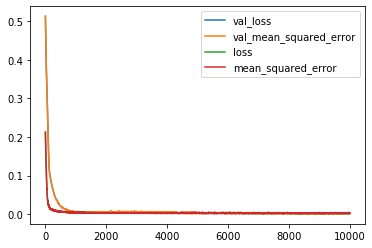

In [250]:
# to plot make data frame out of dict history.history and use .plot() method
pd.DataFrame(history.history).plot()
#pyplot.show()


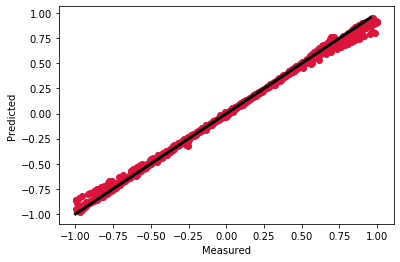

In [251]:
yhat=model.predict(X_test.reshape(X_test.shape[0], k, n_features))
#plt.gca().spines['top'].set_visible(False)

fig, ax = plt.subplots()
#plt.gca().spines['right'].set_visible(False)
ax.scatter(y_test, yhat,  c='crimson')
ax.plot([y_test.min(), yhat.max()], [y_test.min(),  yhat.max()], 'k', lw=3)
#plt.plot(y_test, yhat, zorder=1)  
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


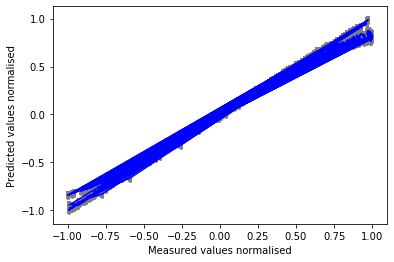

In [152]:
##### plt.scatter(y_test_unscaled , y_pred_unscaled,  color='#0000CC')
fig, ax = plt.subplots()
dy = 0.04
plt.errorbar(y_test, yhat, yerr=dy, fmt='b', color='r',
             ecolor='gray', elinewidth=4, capsize=1);

ax.set_xlabel('Measured values normalised')
ax.set_ylabel('Predicted values normalised')
fig.savefig(fileNameForDLFigures(midfix = 'PredAgainstTested_Charging'))

In [173]:
df_nrm


,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,flowHP,COP,nStratCharging
0,-1.000000,-1.000000,-1.000000,-1.000000,-0.994387,-0.988697,-1.000000,-1.000000,-1.000000,-1.000000,-4.000000e-01,0.997454,-0.984393
1,-0.988292,-0.997219,-1.000000,-0.994339,-1.000000,-1.000000,-1.000000,-0.991593,-1.000000,-0.994397,-4.000000e-01,0.996061,-0.992495
2,-0.964876,-0.988894,-0.988771,-0.994339,-0.988774,-0.974555,-1.000000,-0.985990,-0.988788,-0.991592,-1.000000e+00,1.000000,-1.000000
3,-0.964876,-0.972244,-0.969116,-0.977355,-0.980351,-0.963252,-0.985850,-0.957955,-0.974770,-0.980386,-4.000000e-01,0.980620,-0.983989
4,-0.970730,-0.963919,-0.963502,-0.977355,-0.980351,-0.985867,-0.977350,-0.957955,-0.969168,-0.980386,-4.000000e-01,0.978897,-0.973981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,0.970626,0.991617,0.988688,1.000000,0.994346,0.985767,0.974341,0.994356,0.983061,0.991526,-7.105427e-15,-0.999375,0.773884
649,0.964754,0.994406,0.991516,0.997148,0.997173,0.988613,0.982900,0.997178,0.991535,0.994348,8.000000e-01,-0.997851,0.825003
650,0.970626,1.000000,0.997172,0.997148,1.000000,0.991460,0.985750,0.997178,1.000000,0.991526,4.000000e-01,-0.992920,0.947610
651,0.982386,1.000000,0.997172,0.994297,0.997173,0.994307,1.000000,1.000000,0.997178,0.994348,-7.105427e-15,-0.990666,0.997942


In [169]:
y_test.shape

(130, 12)

In [252]:
df_nrm_flowHP = df_nrm[['flowHP']]
df_nrm_flowHP_short = df_nrm_flowHP[:y_test.shape[0]]
df_nrm_flowHP_short 

,flowHP
0,-0.4
1,-0.4
2,-1.0
3,-0.4
4,-0.4
...,...
125,-0.4
126,-0.6
127,-0.4
128,-0.2


In [253]:
yhat_copy = yhat.copy()
yhat_copy_df = pd.DataFrame(yhat_copy)
yhat_copy_new_df = yhat_copy_df.insert(loc=10, column='flowHP', value=df_nrm_flowHP_short )
#yhat_copy_df
yhat_copy_df


y_test_copy = y_test.copy()
y_test_copy_df = pd.DataFrame(y_test_copy)
y_test_copy_df.insert(loc=10, column='flowHP', value=df_nrm_flowHP_short )

In [474]:
yhat_copy_df

,0,1,2,3,4,5,6,7,8,9,flowHP,10,11
0,-0.936315,-0.942388,-0.959451,-0.976049,-0.960855,-0.970133,-0.947764,-0.928201,-0.938708,-0.941111,-0.4,0.955163,-0.954588
1,-0.924802,-0.928059,-0.944711,-0.959866,-0.944232,-0.952870,-0.931550,-0.912156,-0.922401,-0.924469,-0.4,0.950906,-0.891574
2,-0.904486,-0.906730,-0.923145,-0.938434,-0.923162,-0.931806,-0.910666,-0.891474,-0.901648,-0.903595,-1.0,0.928236,-0.881014
3,-0.875420,-0.872100,-0.887851,-0.900451,-0.884368,-0.891748,-0.872390,-0.853659,-0.863221,-0.864490,-0.4,0.912012,-0.757615
4,-0.860445,-0.854954,-0.870338,-0.881836,-0.865488,-0.872371,-0.853827,-0.835332,-0.844710,-0.845760,-0.4,0.901349,-0.709428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.777210,0.883791,0.887847,0.881924,0.876668,0.874865,0.873560,0.875140,0.871395,0.882724,-0.4,-0.825601,0.760609
126,0.791839,0.898867,0.903075,0.896903,0.891332,0.889453,0.888107,0.889518,0.885776,0.897127,-0.6,-0.843100,0.760700
127,0.805862,0.913522,0.917870,0.911403,0.905485,0.903524,0.902139,0.903446,0.899732,0.911188,-0.4,-0.859292,0.763866
128,0.809054,0.916472,0.920789,0.914703,0.908929,0.907056,0.905656,0.906883,0.903091,0.914474,-0.2,-0.861735,0.771187


In [255]:
def unscale(y_values, scaler):
    return scaler.inverse_transform(y_values)

y_pred_unscaled, y_test_unscaled = unscale(yhat_copy_df, scaler), unscale(y_test_copy_df, scaler)



In [256]:
y_pred_unscaled_df = pd.DataFrame(y_pred_unscaled)
y_pred_unscaled_df
y_pred_unscaled_df =y_pred_unscaled_df.loc[:, y_pred_unscaled_df.columns != 10]
y_pred_unscaled_df

column_name  = [i for i in range(0, y_pred_unscaled_df.shape[1])]
y_pred_unscaled_df.columns  = column_name
y_pred_unscaled_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,23.328900,26.842800,27.306149,27.882221,28.271056,28.867679,29.913784,30.291961,30.232702,29.831086,3.012954,0.026752
1,23.395376,27.017497,27.483881,28.075747,28.471555,29.074468,30.107784,30.485853,30.429772,30.032179,3.011439,0.057906
2,23.512676,27.277540,27.743921,28.332044,28.725685,29.326789,30.357654,30.735783,30.680562,30.284405,3.003371,0.063126
3,23.680494,27.699755,28.169502,28.786260,29.193603,29.806645,30.815608,31.192765,31.144948,30.756926,2.997596,0.124133
4,23.766953,27.908795,28.380682,29.008875,29.421334,30.038756,31.037707,31.414237,31.368654,30.983250,2.993801,0.147956
...,...,...,...,...,...,...,...,...,...,...,...,...
125,33.222364,49.107488,49.581047,50.100884,50.434522,50.968718,51.705287,52.084525,52.107434,51.869303,2.379173,0.874722
126,33.306829,49.291293,49.764666,50.280011,50.611387,51.143463,51.879339,52.258274,52.281226,52.043340,2.372945,0.874768
127,33.387797,49.469970,49.943072,50.453410,50.782095,51.312020,52.047232,52.426585,52.449880,52.213241,2.367182,0.876333
128,33.406224,49.505929,49.978268,50.492869,50.823637,51.354334,52.089305,52.468127,52.490474,52.252950,2.366312,0.879952


In [257]:
y_test_unscaled_df = pd.DataFrame(y_test_unscaled)
y_test_unscaled_df

y_test_unscaled_df =y_test_unscaled_df.loc[:, y_test_unscaled_df.columns != 10]
y_test_unscaled_df
column_name  = [i for i in range(0, y_test_unscaled_df.shape[1])]
y_test_unscaled_df.columns  = column_name
y_test_unscaled_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,23.0964,26.6819,27.3588,27.9343,28.1374,28.6453,29.5936,30.0001,30.0340,29.4920,3.019614,0.007649
1,23.1979,26.8849,27.5281,28.0359,28.2052,28.9501,29.7291,30.1695,30.2034,29.7630,3.016621,0.009775
2,23.2993,27.0542,27.6635,28.1374,28.4760,28.9840,30.1018,30.4405,30.4067,30.0001,3.015841,0.038417
3,23.6374,27.6635,28.0020,28.5438,29.0179,29.3227,30.6438,30.9149,31.1182,30.7116,3.002315,0.116585
4,23.7726,27.8666,28.1713,28.8485,29.2211,29.7630,30.8471,31.2877,31.2199,30.9149,2.996786,0.127632
...,...,...,...,...,...,...,...,...,...,...,...,...
125,33.9999,49.9108,50.3880,51.0356,51.3084,51.8539,52.3313,52.9793,52.9793,52.8088,2.332853,0.842168
126,34.2374,50.1494,50.5925,51.2061,51.5470,52.0926,52.8429,53.3546,53.2181,52.8770,2.326067,0.846164
127,34.4409,50.3880,50.7288,51.4106,51.7516,52.1949,52.9793,53.3887,53.4228,53.1499,2.318060,0.850305
128,34.3391,50.4221,50.7970,51.5129,51.8539,52.2972,52.9111,53.5252,53.4569,53.1840,2.317326,0.881285


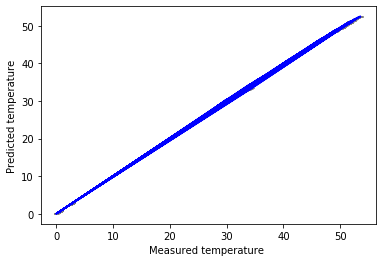

In [258]:
##### plt.scatter(y_test_unscaled , y_pred_unscaled,  color='#0000CC')
fig, ax = plt.subplots()
dy = 0.04
plt.errorbar(np.array(y_test_unscaled_df), np.array(y_pred_unscaled_df), yerr=dy, fmt='b', color='r',
             ecolor='gray', elinewidth=4, capsize=2);

ax.set_xlabel('Measured temperature ')
ax.set_ylabel('Predicted temperature')
fig.savefig(fileNameForDLFigures(midfix = 'PredAgainstTested_Charging'))

In [259]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x432 with 0 Axes>

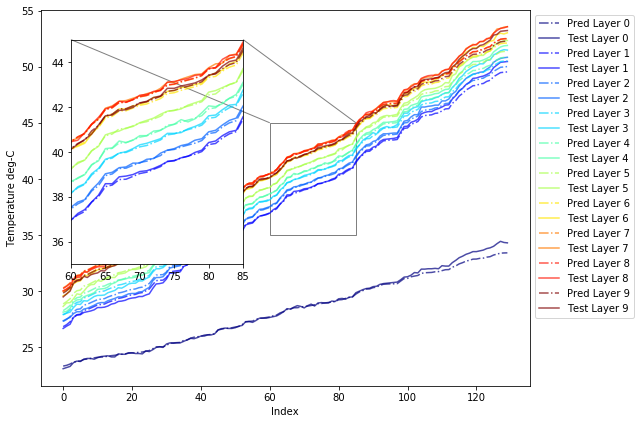

(<Figure size 648x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f08b0603490>)

In [260]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
def plotPredAndActualTem(yhat, ytest, alpha =0.7, scm=None):
    cmap_name = "jet"
    fig = plt.figure(figsize=(6,6))
    #ax = fig.add_subplot()
    fig, ax = plt.subplots(1, figsize=(9,6))
    #fig.subplots_adjust(left=0.2, bottom=0.2)
    
    tem_Pred_df = pd.DataFrame(yhat).iloc[:,0:-2]
    tem_test_df =  pd.DataFrame(ytest).iloc[:,0:-2]
    
   # len_df = len(tem_Pred_df)
    
    tem_PredZoom_df = tem_Pred_df.iloc[20:40, :]
    tem_TestZoom_df = tem_test_df.iloc[20:40, :]
    
    

    scm = create_color_step_obj(cmap_name, 10)
    
    #########################
    axins = zoomed_inset_axes(ax, 2,  loc=2, borderpad=3)
    mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
    axins.set_xlim([60,85])
    axins.set_ylim([35,45])
    for i in range (0,  tem_Pred_df.shape[1]):
        ax.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        ax.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))
        


        axins.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        
        axins.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))

        #plt.show()
 
        '''
        sub_axes = plt.axes([.2, .55, .3, .3]) 
        sub_axes.plot(tem_PredZoom_df.index, tem_PredZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i)) 
        sub_axes.plot( tem_TestZoom_df.index,  tem_TestZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot') 
        '''
    
    
        #ax.legend(bbox_to_anchor=(0.8,0.8))
        ax.set_ylabel('Temperature deg-C')
        ax.set_xlabel('Index')
        #ax.legend(bbox_to_anchor=(0.4,0.8))
    #mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.1")
    fig.canvas.draw()
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    fig.savefig(fileNameForDLFigures(midfix = 'Tem_Charging'))
    return fig, ax
plotPredAndActualTem(y_pred_unscaled_df, y_test_unscaled_df, alpha =0.7, scm=None)

No handles with labels found to put in legend.
/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f08b0460090>)

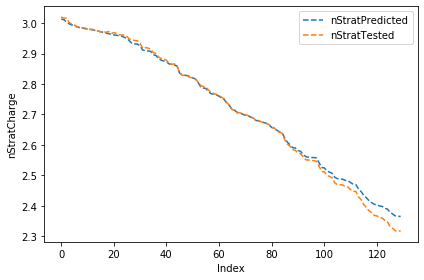

In [261]:
def plotCOP(yhat_df, ytest_df):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.legend(loc='best')
    ax.set_xlabel('Index')
    ax.set_ylabel('nStratCharge', color='k')
    
    y_pred_df = yhat_df
    y_tested_df = ytest_df
    ax.plot(y_pred_df.index,y_pred_df.iloc[:, -2],label  = 'nStratPredicted', ls = 'dashed')
    ax.plot( y_tested_df.index, y_tested_df.iloc[:, -2],label  = 'nStratTested', ls = 'dashed')
    ax.legend()
    fig.tight_layout()
    fig.show()
    fig.savefig(fileNameForDLFigures(midfix = 'COP_Charging'))
    return fig, ax

plotCOP(y_pred_unscaled_df,y_test_unscaled_df)

In [220]:
fileNameForDLFigures(midfix = 'nStrat_Charging')

'/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql/10_05_2021/nStrat_Charging2021_04_28.svg'

No handles with labels found to put in legend.
/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f08e057a310>)

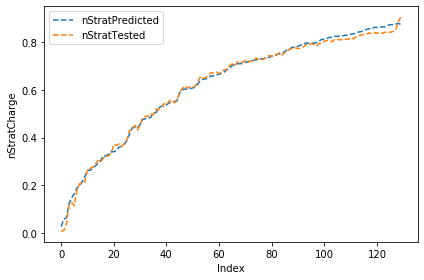

In [262]:
def plotnStrat(yhat_df, ytest_df):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.legend(loc='best')
    ax.set_xlabel('Index')
    ax.set_ylabel('nStratCharge', color='k')
    
    y_pred_df = yhat_df
    y_tested_df = ytest_df
    ax.plot(y_pred_df.index,y_pred_df.iloc[:, -1],label  = 'nStratPredicted', ls = 'dashed')
    ax.plot( y_tested_df.index, y_tested_df.iloc[:, -1],label  = 'nStratTested', ls = 'dashed')
    ax.legend()
    fig.tight_layout()
    fig.show()
    fig.savefig(fileNameForDLFigures(midfix = 'nStrat_Charging'))
    return fig, ax

plotnStrat(y_pred_unscaled_df,y_test_unscaled_df)

In [501]:
#print (disChargingIn_df[['nStratDischarge']].to_string())
print (disChargingIn_df[['T6']].to_string())

          T6
0    52.8770
1    52.8770
2    52.9111
3    52.8770
4    52.8770
5    52.8429
6    52.8770
7    52.8770
8    52.9111
9    52.8429
10   52.9111
11   52.8770
12   52.8770
13   52.9111
14   52.8770
15   52.8770
16   52.9111
17   52.8429
18   52.8770
19   52.8429
20   52.8770
21   52.8429
22   52.8770
23   52.9111
24   52.8429
25   52.8770
26   52.8770
27   52.8088
28   52.8429
29   52.8429
30   52.8770
31   52.8429
32   52.8088
33   52.7747
34   52.8429
35   52.8088
36   52.8088
37   52.8429
38   52.8088
39   52.8429
40   52.8088
41   52.7747
42   52.8429
43   52.8088
44   52.7747
45   52.7406
46   52.8088
47   52.7747
48   52.8088
49   52.8088
50   52.7747
51   52.8088
52   52.7747
53   52.8088
54   52.7747
55   52.7406
56   52.7065
57   52.7406
58   52.7406
59   52.7747
60   52.7747
61   52.7747
62   52.7406
63   52.6724
64   52.7065
65   52.7065
66   52.7065
67   52.6383
68   52.6724
69   52.6724
70   52.6724
71   52.6042
72   52.6042
73   52.6042
74   52.6042
75   52.6042

In [394]:
df_Dis_nrm, scaler = normalize(disChargingIn_df)
df_Dis_nrm = pd.DataFrame(df_Dis_nrm)
df_Dis_nrm.columns = disChargingIn_df.columns
df_Dis_nrm

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,flowLoad,nDis,nStratDischarge
0,0.800915,0.997706,1.000000,0.997787,0.997821,0.995703,0.997835,0.997731,0.994873,1.000000,-1.000000,-0.994409,-1.000000
1,0.796482,1.000000,1.000000,1.000000,1.000000,1.000000,0.997835,0.995461,0.997436,0.982182,0.982064,-1.000000,-0.752373
2,0.792063,0.995412,1.000000,0.995574,0.997821,1.000000,1.000000,0.997731,1.000000,0.973285,0.847532,-0.997398,-0.612232
3,0.840719,0.944969,0.995494,0.995574,0.997821,1.000000,0.997835,0.995461,0.992309,1.000000,0.569500,-0.992440,-0.485141
4,0.942478,0.867031,0.995494,0.997787,0.993462,0.997851,0.997835,0.995461,0.989746,1.000000,0.587447,-0.986906,-0.360975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,-0.925099,-0.963631,-0.975444,-0.986846,-0.993526,-0.995740,-0.995709,-0.988747,-0.949113,-0.671415,0.049330,0.963616,0.998978
379,-0.929505,-0.963631,-0.977677,-0.982459,-0.991366,-0.985098,-0.995709,-0.988747,-0.961833,-0.715817,0.085202,0.971643,0.998277
380,-0.929505,-0.963631,-0.975444,-0.984653,-0.989206,-0.997870,-0.997854,-0.993252,-0.977101,-0.822389,0.121074,0.979040,0.999368
381,-0.929505,-0.961357,-0.975444,-0.989033,-0.987046,-0.989358,-0.997854,-0.993252,-0.989821,-0.893428,0.147978,0.988260,0.999646


In [406]:
X_Dis = df_Dis_nrm.iloc[:, :-3]
y_Dis =df_Dis_nrm.loc[:, df_Dis_nrm.columns != 'flowLoad']
mLoad = df_Dis_nrm[['flowLoad']]


In [428]:
X_Dis_df1, y_Dis_df1 = prepare_df(X_Dis, mLoad, y_Dis)

In [429]:
X_Dis_df1.shape

(380, 33)

In [430]:
 y_Dis_df1.shape

(380, 12)

In [431]:
train_indexes_Dis, test_indexes_Dis = train_test_split_indexes(X_Dis_df1, \
                                                       y_Dis_df1, test_size=0.2, random_state=42, shuffle=True)
X_train_Dis, X_test_Dis, y_train_Dis, y_test_Dis = splitter(pd.DataFrame(X_Dis_df1),\
                                            pd.DataFrame(y_Dis_df1), train_indexes_Dis, test_indexes_Dis)



In [432]:
X_train_Dis.shape

(304, 33)

In [433]:
X_test_Dis.shape


(76, 33)

In [464]:
y_test_Dis.shape[0]

76

In [435]:
X_train_Dis = np.array(X_train_Dis)

X_test_Dis = np.array(X_test_Dis)

y_train_Dis = np.array(y_train_Dis)

y_test_Dis = np.array(y_test_Dis)

In [507]:
k =3
n_features = 11
out_features = y_train_Dis.shape[1]
#out_features
epochs =10000
batch_size = 10000

In [508]:
def create_model_Dis(time_steps, n_features):
    model = Sequential()
    model.add(LSTM(20, input_shape = (time_steps, n_features)))
    model.add(Dropout(0.2))
    model.add(Dense(out_features, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model


In [509]:
modelDir(ModelName='Dis_InTemMhpOutTnCOP1.h5')

'/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql/11_05_2021/Dis_InTemMhpOutTnCOP1.h5'

In [510]:

model_Dis = create_model_Dis(k, n_features)
model_fpath=modelDir(ModelName='Dis_InTemMhpOutTnCOP1.h5')
callbacks_list = [ ModelCheckpoint(filepath=model_fpath,
                                   monitor="val_loss",
                                   save_best_only=True,
                                   mode="min")]

In [511]:
history = model_Dis.fit(X_train_Dis.reshape(X_train_Dis.shape[0], k, n_features),
                    y_train_Dis.reshape(y_train_Dis.shape[0], out_features),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.3,
                    callbacks = callbacks_list,
                    verbose=1)

ValueError: cannot reshape array of size 10032 into shape (304,1,11)

In [446]:
model_Dis.save(model_fpath)

from keras.models import load_model
model_Dis = load_model(model_fpath)

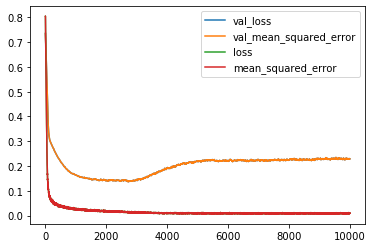

In [447]:
pd.DataFrame(history.history).plot()

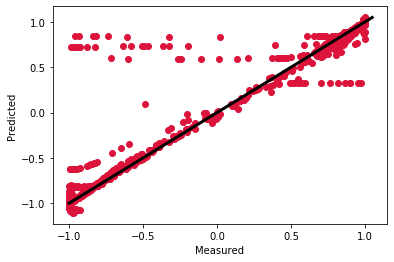

In [449]:
yhat_Dis=model_Dis.predict(X_test_Dis.reshape(X_test_Dis.shape[0], k, n_features))
#plt.gca().spines['top'].set_visible(False)

fig, ax = plt.subplots()
#plt.gca().spines['right'].set_visible(False)
ax.scatter(y_test_Dis, yhat_Dis,  c='crimson')
ax.plot([y_test_Dis.min(), yhat_Dis.max()], [y_test_Dis.min(),  yhat_Dis.max()], 'k', lw=3)
#plt.plot(y_test, yhat, zorder=1)  
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [465]:
#X_t.shape[0]

130

In [466]:
df_Dis_nrm_flowLoad = df_Dis_nrm[['flowLoad']]
df_Dis_nrm_flowLoad_short = df_Dis_nrm_flowLoad[:y_test_Dis.shape[0]]
df_Dis_nrm_flowLoad_short 

,flowLoad
0,-1.000000
1,0.982064
2,0.847532
3,0.569500
4,0.587447
...,...
71,-0.273543
72,-0.282511
73,-0.246638
74,-0.246638


In [480]:
yhat_Dis_copy = yhat_Dis.copy()
yhat_Dis_copy_df = pd.DataFrame(yhat_Dis_copy)
yhat_Dis_copy_df.insert(loc=10, column='flowLoad', value=df_Dis_nrm_flowLoad_short  )
#yhat_copy_df
#print (yhat_Dis_copy_new_df)
#yhat_Dis_copy.shape
#yhat_Dis_copy_df

y_test_Dis_copy = y_test_Dis.copy()
y_test_Dis_copy_df = pd.DataFrame(y_test_Dis_copy)
y_test_Dis_copy_df.insert(loc=10, column='flowHP', value=df_Dis_nrm_flowLoad_short )
#y_test_Dis_copy_df 
#yhat_Dis_copy_df

,0,1,2,3,4,5,6,7,8,9,flowHP,10,11
0,0.840719,0.944969,0.995494,0.995574,0.997821,1.000000,0.997835,0.995461,0.992309,1.000000,-1.000000,-0.992440,-0.485141
1,1.000000,0.855567,0.988736,0.993361,0.993462,0.997851,0.997835,0.997731,0.994873,0.982182,0.982064,-0.975213,-0.200671
2,0.933625,0.834941,0.986483,0.993361,0.993462,0.997851,1.000000,0.995461,0.997436,1.000000,0.847532,-0.966597,-0.073447
3,0.624021,0.802864,0.968468,0.986723,0.993462,0.991405,0.997835,0.995461,0.994873,0.982182,0.569500,-0.945823,0.158694
4,0.349982,0.544097,0.934689,0.986723,0.986925,0.993554,0.997835,0.993192,0.992309,0.991104,0.587447,-0.918165,0.330874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.955946,-0.977268,-0.984369,-0.993420,-0.993526,-0.991481,-0.967821,-0.945996,-0.737813,-0.111685,-0.273543,0.862221,0.998605
72,-0.951539,-0.972720,-0.982143,-0.993420,-0.989206,-0.989358,-0.976403,-0.959498,-0.819297,-0.244971,-0.282511,0.896508,0.998391
73,-0.942726,-0.970446,-0.982143,-0.993420,-0.993526,-1.000000,-0.976403,-0.957249,-0.837122,-0.262764,-0.246638,0.899739,0.998772
74,-0.933912,-0.965898,-0.977677,-0.989033,-0.991366,-0.991481,-0.991417,-0.979749,-0.936385,-0.600350,-0.246638,0.954378,0.999502


In [481]:
y_pred_unscaled_Dis, y_test_unscaled_Dis = unscale(yhat_Dis_copy_df, scaler), unscale(y_test_Dis_copy_df, scaler)



In [482]:
y_pred_unscaled_Dis_df = pd.DataFrame(y_pred_unscaled_Dis)
y_pred_unscaled_Dis_df
y_pred_unscaled_Dis_df =y_pred_unscaled_Dis_df.loc[:, y_pred_unscaled_Dis_df.columns != 10]
y_pred_unscaled_Dis_df

column_name  = [i for i in range(0, y_pred_unscaled_Dis_df.shape[1])]
y_pred_unscaled_Dis_df.columns  = column_name
y_pred_unscaled_Dis_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,33.793006,47.344438,50.996101,49.806998,50.569348,52.247201,52.594418,52.943512,53.067688,52.978392,0.038400,0.547107
1,34.927544,49.244786,51.849593,51.737026,51.842262,52.854345,52.767671,53.029000,53.110273,53.002483,0.014311,0.493461
2,34.496351,48.065801,49.549410,51.899244,52.276335,52.490052,52.738851,53.026779,53.099445,52.993708,0.025961,0.501799
3,33.050285,45.385626,50.200881,51.333265,51.969884,52.628477,52.797805,53.011543,53.102602,52.989382,0.036959,0.580018
4,31.620658,41.542400,49.514137,51.157591,51.896533,52.642391,52.789466,53.005194,53.098568,52.980887,0.053742,0.637863
...,...,...,...,...,...,...,...,...,...,...,...,...
71,20.507448,19.608269,21.606025,22.423713,23.129697,24.165018,27.301337,49.019604,51.077467,51.499023,0.622405,0.995210
72,20.477525,19.553967,21.569716,22.444132,23.156946,24.129689,27.265634,49.015941,51.075888,51.497090,0.622893,0.996640
73,20.480474,19.562935,21.597816,22.472319,23.219345,24.167059,27.284003,49.019681,51.078462,51.498429,0.622288,0.996748
74,20.467845,19.591361,21.578678,22.609373,23.250152,24.226147,27.273793,49.022482,51.081252,51.499137,0.621636,0.998216


In [483]:
y_test_unscaled_Dis_df = pd.DataFrame(y_test_unscaled_Dis)
y_test_unscaled_Dis_df

y_test_unscaled_Dis_df =y_test_unscaled_Dis_df.loc[:, y_test_unscaled_Dis_df.columns != 10]
y_test_unscaled_Dis_df
column_name  = [i for i in range(0, y_test_unscaled_Dis_df.shape[1])]
y_test_unscaled_Dis_df.columns  = column_name
y_test_unscaled_Dis_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,35.1533,50.0131,51.2402,51.8539,52.2290,52.8770,52.8770,53.0476,53.1158,53.0476,0.007821,0.274274
1,36.3750,48.6842,51.1379,51.8198,52.1608,52.8429,52.8770,53.0817,53.1499,52.9793,0.015864,0.408663
2,35.8659,48.3776,51.1038,51.8198,52.1608,52.8429,52.9111,53.0476,53.1840,53.0476,0.019888,0.468765
3,33.4912,47.9008,50.8311,51.7175,52.1608,52.7406,52.8770,53.0476,53.1499,52.9793,0.029588,0.578433
4,31.3893,44.0544,50.3198,51.7175,52.0585,52.7747,52.8770,53.0135,53.1158,53.0135,0.042503,0.659774
...,...,...,...,...,...,...,...,...,...,...,...,...
71,21.3727,21.4403,21.2714,21.2038,21.0686,21.2714,21.9134,23.8741,30.1018,48.7864,0.873861,0.975222
72,21.4065,21.5079,21.3051,21.2038,21.1362,21.3051,21.7782,23.6712,29.0179,48.2755,0.889871,0.975121
73,21.4741,21.5417,21.3051,21.2038,21.0686,21.1362,21.7782,23.7050,28.7808,48.2073,0.891380,0.975301
74,21.5417,21.6093,21.3727,21.2714,21.1024,21.2714,21.5417,23.3669,27.4604,46.9133,0.916894,0.975646


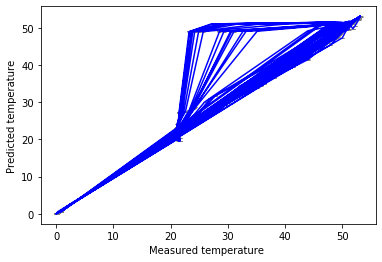

In [484]:
##### plt.scatter(y_test_unscaled , y_pred_unscaled,  color='#0000CC')
fig, ax = plt.subplots()
dy = 0.04
plt.errorbar(np.array(y_test_unscaled_Dis_df), np.array(y_pred_unscaled_Dis_df), yerr=dy, fmt='b', color='r',
             ecolor='gray', elinewidth=4, capsize=2);

ax.set_xlabel('Measured temperature ')
ax.set_ylabel('Predicted temperature')
fig.savefig(fileNameForDLFigures(midfix = 'PredAgainstTested_Charging'))

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x432 with 0 Axes>

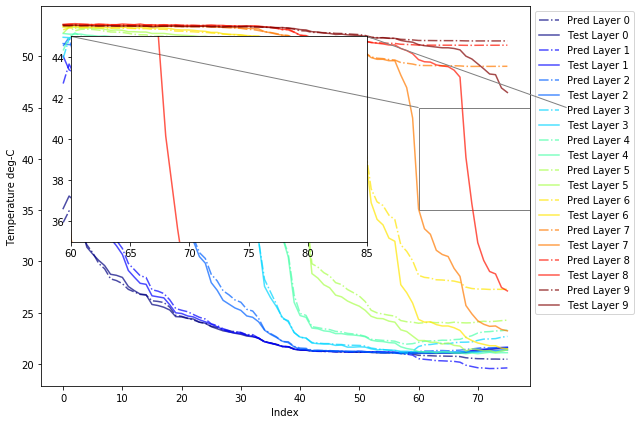

(<Figure size 648x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0886ac1e10>)

In [485]:
plotPredAndActualTem(y_pred_unscaled_Dis_df, y_test_unscaled_Dis_df, alpha =0.7, scm=None)

In [502]:
disChargingIn_df


    
    

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,flowLoad,nDis,nStratDischarge
0,34.8480,50.7970,51.3084,51.8880,52.2290,52.8088,52.8770,53.0817,53.1499,53.0476,413.206,0.006901,0.031045
1,34.8140,50.8311,51.3084,51.9221,52.2631,52.8770,52.8770,53.0476,53.1840,52.9793,587.586,0.004290,0.148028
2,34.7801,50.7629,51.3084,51.8539,52.2290,52.8770,52.9111,53.0817,53.2181,52.9452,575.750,0.005505,0.214233
3,35.1533,50.0131,51.2402,51.8539,52.2290,52.8770,52.8770,53.0476,53.1158,53.0476,551.289,0.007821,0.274274
4,35.9338,48.8546,51.2402,51.8880,52.1608,52.8429,52.8770,53.0476,53.0817,53.0476,552.868,0.010405,0.332932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,21.6093,21.6430,21.4065,21.3051,21.0686,21.2038,21.4741,23.2317,27.2911,46.6409,505.525,0.921207,0.975399
379,21.5755,21.6430,21.3727,21.3727,21.1024,21.3727,21.4741,23.2317,27.1219,46.4707,508.681,0.924956,0.975067
380,21.5755,21.6430,21.4065,21.3389,21.1362,21.1700,21.4403,23.1640,26.9188,46.0622,511.837,0.928410,0.975582
381,21.5755,21.6768,21.4065,21.2714,21.1700,21.3051,21.4403,23.1640,26.7496,45.7899,514.204,0.932715,0.975714


<Figure size 432x432 with 0 Axes>

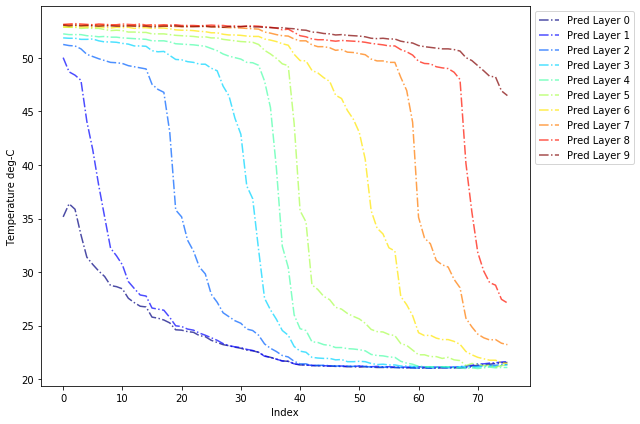

(<Figure size 648x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f08867f69d0>)

In [506]:

def plotCheckTem(yhat, alpha =0.7, scm=None):
    cmap_name = "jet"
    fig = plt.figure(figsize=(6,6))

    fig, ax = plt.subplots(1, figsize=(9,6))
    
    tem_Pred_df = pd.DataFrame(yhat).iloc[:,0:-2]
    
    scm = create_color_step_obj(cmap_name, 10)
    
    for i in range (0,  tem_Pred_df.shape[1]):
        ax.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        #ax.legend(bbox_to_anchor=(0.8,0.8))
        ax.set_ylabel('Temperature deg-C')
        ax.set_xlabel('Index')
        #ax.legend(bbox_to_anchor=(0.4,0.8))
    #mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.1")
    fig.canvas.draw()
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    return fig, ax
plotCheckTem(y_test_unscaled_Dis_df,alpha =0.7, scm=None)

<Figure size 432x432 with 0 Axes>

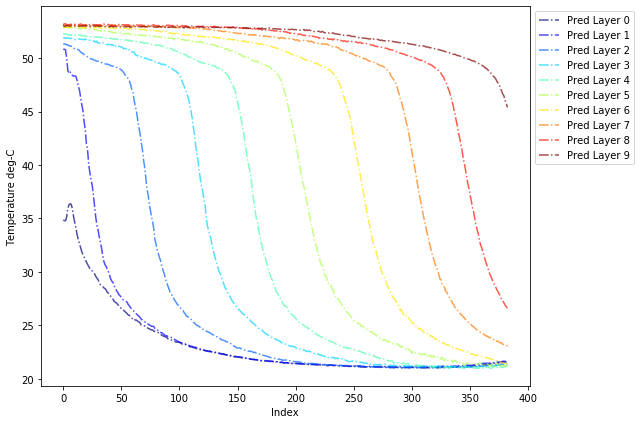

(<Figure size 648x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f088685ca90>)

In [512]:
def plotCheckTem(yhat, alpha =0.7, scm=None):
    cmap_name = "jet"
    fig = plt.figure(figsize=(6,6))

    fig, ax = plt.subplots(1, figsize=(9,6))
    
    tem_Pred_df = pd.DataFrame(yhat).iloc[:,0:-3]
    
    scm = create_color_step_obj(cmap_name, 10)
    
    for i in range (0,  tem_Pred_df.shape[1]):
        ax.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        #ax.legend(bbox_to_anchor=(0.8,0.8))
        ax.set_ylabel('Temperature deg-C')
        ax.set_xlabel('Index')
        #ax.legend(bbox_to_anchor=(0.4,0.8))
    #mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.1")
    fig.canvas.draw()
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    return fig, ax
plotCheckTem(disChargingIn_df,alpha =0.7, scm=None)

<Figure size 432x432 with 0 Axes>

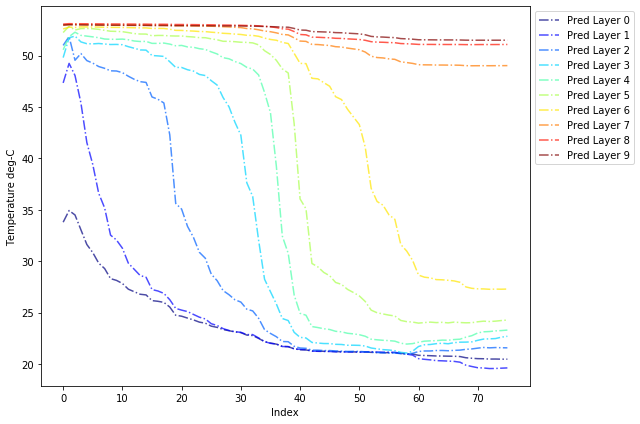

(<Figure size 648x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f088660a890>)

In [516]:
def plotCheckTem(yhat, alpha =0.7, scm=None):
    cmap_name = "jet"
    fig = plt.figure(figsize=(6,6))

    fig, ax = plt.subplots(1, figsize=(9,6))
    
    tem_Pred_df = pd.DataFrame(yhat).iloc[:,0:-2]
    
    scm = create_color_step_obj(cmap_name, 10)
    
    for i in range (0,  tem_Pred_df.shape[1]):
        ax.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        #ax.legend(bbox_to_anchor=(0.8,0.8))
        ax.set_ylabel('Temperature deg-C')
        ax.set_xlabel('Index')
        #ax.legend(bbox_to_anchor=(0.4,0.8))
    #mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.1")
    fig.canvas.draw()
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    return fig, ax
plotCheckTem(y_pred_unscaled_Dis_df,alpha =0.7, scm=None)

In [ ]:
k =1
n_features = 11
out_features = y_train_Dis.shape[1]
#out_features
epochs =10000
batch_size = 10000
def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    #arr = np.ndarray.flatten(np.array(df))
    #append(arr,)
    
    return np.ndarray.flatten(np.array(df))
def prepare_df(df, m, y_df):
    n_rows, n_cols = df.shape
    new_rows = np.array([np.append(flatten_row_wise(df.iloc[(i-k):i]), m.iloc[i-k:i]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in y_df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys